In [575]:
#기본 라이브러리 설치
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import font_manager, rc
%config InlineBackend.figure_format = 'retina'  #plot내 글씨를 선명하게 해주는 옵션

from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import OrdinalEncoder
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import MaxAbsScaler
from sklearn.preprocessing import RobustScaler

In [576]:
# 한글 폰트 설정
font_path = "c:/Windows/Fonts/malgun.ttf"  # Windows의 맑은 고딕 폰트 경로
font = font_manager.FontProperties(fname=font_path).get_name()
rc('font', family=font)

# 마이너스 기호가 깨지지 않도록 설정
plt.rcParams['axes.unicode_minus'] = False

## 데이터 불러오기
- 1차 전처리가 완료된 2주차 과제 파일 불러오기

In [577]:
data = pd.read_csv("modified_train.csv")
data

,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),...,연도,월,일,요일,Visibility Category,Rainfall Category,Snowfall Category,Wind Speed Category,Temperature(°C)_std,Solar Radiation (MJ/m2)_std
0,1492,16,0.301774,42.0,1.300000,1976,5.0,0.755566,0.0,0.0,...,2018,10,24,Wednesday,1668-2000,0,Low Snowfall,1.00 - 1.60,0.301774,0.755566
1,1536,14,0.833285,64.0,2.800000,520,15.8,1.187660,0.0,0.0,...,2018,5,1,Tuesday,0-925,0,Low Snowfall,2.20 - 7.30,0.833285,1.187660
2,327,2,-0.561932,59.0,0.600000,1584,-1.2,-0.669179,0.0,0.0,...,2018,11,14,Wednesday,925-1668,0,Low Snowfall,0.20 - 1.00,-0.561932,-0.669179
3,170,4,0.849895,83.0,1.600000,1102,20.1,-0.669179,0.0,0.0,...,2018,8,31,Friday,925-1668,0,Low Snowfall,1.00 - 1.60,0.849895,-0.669179
4,45,5,0.891419,64.0,0.900000,876,16.4,-0.669179,0.1,0.0,...,2018,6,26,Tuesday,0-925,Non-0,Low Snowfall,0.20 - 1.00,0.891419,-0.669179
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
360,1195,9,0.866505,59.0,3.000000,1974,14.9,1.035843,0.0,0.0,...,2018,9,5,Wednesday,1668-2000,0,Low Snowfall,2.20 - 7.30,0.866505,1.035843
361,243,1,-0.620066,42.0,1.561914,2000,-6.4,-0.669179,0.0,0.0,...,2018,3,20,Tuesday,2000 이상,0,Low Snowfall,1.00 - 1.60,-0.620066,-0.669179
362,186,3,0.600749,82.0,1.400000,1202,17.0,-0.669179,0.0,0.0,...,2018,9,17,Monday,925-1668,0,Low Snowfall,1.00 - 1.60,0.600749,-0.669179
363,531,15,2.186979,37.0,2.300000,1892,21.9,2.624083,0.0,0.0,...,2018,8,1,Wednesday,1668-2000,0,Low Snowfall,2.20 - 7.30,2.186979,2.624083


In [578]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 365 entries, 0 to 364
Data columns (total 23 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Rented Bike Count            365 non-null    int64  
 1   Hour                         365 non-null    int64  
 2   Temperature(°C)              365 non-null    float64
 3   Humidity(%)                  365 non-null    float64
 4   Wind speed (m/s)             365 non-null    float64
 5   Visibility (10m)             365 non-null    int64  
 6   Dew point temperature(°C)    365 non-null    float64
 7   Solar Radiation (MJ/m2)      365 non-null    float64
 8   Rainfall(mm)                 365 non-null    float64
 9   Snowfall (cm)                365 non-null    float64
 10  Seasons                      365 non-null    object 
 11  Holiday                      365 non-null    object 
 12  Functioning Day              365 non-null    object 
 13  연도                  

- 명목형 변수 : Seasons, Holiday, Functioning Day (필요한 것만)
- 순서형 변수 : 없음

#### OneHotEncoder이용하여 명목형 변수 수치화

In [579]:
data_v1 = data.copy()

In [580]:
ohe = OneHotEncoder(sparse_output=False) #sparse_output=False: 희소행렬로 반환 X

result_ohe = ohe.fit_transform(data_v1[["Seasons"]])
result_ohe

array([[1., 0., 0., 0.],
       [0., 1., 0., 0.],
       [1., 0., 0., 0.],
       ...,
       [1., 0., 0., 0.],
       [0., 0., 1., 0.],
       [0., 1., 0., 0.]])

In [581]:
#각 변수들의 카테고리가 학습된 것을 확인
ohe.categories_

[array(['Autumn', 'Spring', 'Summer', 'Winter'], dtype=object)]

In [582]:
#result_ohe는 numpy.array이므로 데이터프레임으로 변환
df_ohe = pd.DataFrame(result_ohe, columns=ohe.get_feature_names_out(["Seasons"]))
df_ohe

,Seasons_Autumn,Seasons_Spring,Seasons_Summer,Seasons_Winter
0,1.0,0.0,0.0,0.0
1,0.0,1.0,0.0,0.0
2,1.0,0.0,0.0,0.0
3,0.0,0.0,1.0,0.0
4,0.0,0.0,1.0,0.0
...,...,...,...,...
360,1.0,0.0,0.0,0.0
361,0.0,1.0,0.0,0.0
362,1.0,0.0,0.0,0.0
363,0.0,0.0,1.0,0.0


- 하나의 칼럼을 제거하여 rank를 하나 줄이는 것도 가능하다.

In [583]:
df_ohe=df_ohe.drop(columns=["Seasons_Spring"])
df_ohe

,Seasons_Autumn,Seasons_Summer,Seasons_Winter
0,1.0,0.0,0.0
1,0.0,0.0,0.0
2,1.0,0.0,0.0
3,0.0,1.0,0.0
4,0.0,1.0,0.0
...,...,...,...
360,1.0,0.0,0.0
361,0.0,0.0,0.0
362,1.0,0.0,0.0
363,0.0,1.0,0.0


In [584]:
data_v1 = pd.concat([data_v1.reset_index(drop=True), df_ohe.reset_index(drop=True)], axis=1)

In [585]:
ohe = OneHotEncoder(sparse_output=False) #sparse_output=False: 희소행렬로 반환 X

result_ohe = ohe.fit_transform(data_v1[["Holiday"]])
result_ohe

array([[0., 1.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.

In [586]:
#각 변수들의 카테고리가 학습된 것을 확인
ohe.categories_

[array(['Holiday', 'No Holiday'], dtype=object)]

In [587]:
#result_ohe는 numpy.array이므로 데이터프레임으로 변환
df_ohe = pd.DataFrame(result_ohe, columns=ohe.get_feature_names_out(["Holiday"]))
df_ohe

,Holiday_Holiday,Holiday_No Holiday
0,0.0,1.0
1,1.0,0.0
2,0.0,1.0
3,0.0,1.0
4,0.0,1.0
...,...,...
360,0.0,1.0
361,0.0,1.0
362,0.0,1.0
363,0.0,1.0


In [588]:
data_v1 = pd.concat([data_v1.reset_index(drop=True), df_ohe.reset_index(drop=True)], axis=1)

In [589]:
ohe = OneHotEncoder(sparse_output=False) #sparse_output=False: 희소행렬로 반환 X

result_ohe = ohe.fit_transform(data_v1[["Functioning Day"]])
result_ohe

array([[0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.

In [590]:
#각 변수들의 카테고리가 학습된 것을 확인
ohe.categories_

[array(['No', 'Yes'], dtype=object)]

In [591]:
#result_ohe는 numpy.array이므로 데이터프레임으로 변환
df_ohe = pd.DataFrame(result_ohe, columns=ohe.get_feature_names_out(["Functioning Day"]))
df_ohe

,Functioning Day_No,Functioning Day_Yes
0,0.0,1.0
1,0.0,1.0
2,0.0,1.0
3,0.0,1.0
4,0.0,1.0
...,...,...
360,0.0,1.0
361,0.0,1.0
362,0.0,1.0
363,0.0,1.0


In [592]:
data_v1 = pd.concat([data_v1.reset_index(drop=True), df_ohe.reset_index(drop=True)], axis=1)

## 변수 선택

In [593]:
data_v1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 365 entries, 0 to 364
Data columns (total 30 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Rented Bike Count            365 non-null    int64  
 1   Hour                         365 non-null    int64  
 2   Temperature(°C)              365 non-null    float64
 3   Humidity(%)                  365 non-null    float64
 4   Wind speed (m/s)             365 non-null    float64
 5   Visibility (10m)             365 non-null    int64  
 6   Dew point temperature(°C)    365 non-null    float64
 7   Solar Radiation (MJ/m2)      365 non-null    float64
 8   Rainfall(mm)                 365 non-null    float64
 9   Snowfall (cm)                365 non-null    float64
 10  Seasons                      365 non-null    object 
 11  Holiday                      365 non-null    object 
 12  Functioning Day              365 non-null    object 
 13  연도                  

In [594]:
#필요없는 칼럼 제거
columns_to_drop = ['Seasons','Holiday', 'Functioning Day', '연도','월','일','요일', 'Visibility Category','Rainfall Category','Snowfall Category','Wind Speed Category','Temperature(°C)_std', 'Solar Radiation (MJ/m2)_std']  
data_final = data_v1.drop(columns=columns_to_drop)
data_final.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 365 entries, 0 to 364
Data columns (total 17 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Rented Bike Count          365 non-null    int64  
 1   Hour                       365 non-null    int64  
 2   Temperature(°C)            365 non-null    float64
 3   Humidity(%)                365 non-null    float64
 4   Wind speed (m/s)           365 non-null    float64
 5   Visibility (10m)           365 non-null    int64  
 6   Dew point temperature(°C)  365 non-null    float64
 7   Solar Radiation (MJ/m2)    365 non-null    float64
 8   Rainfall(mm)               365 non-null    float64
 9   Snowfall (cm)              365 non-null    float64
 10  Seasons_Autumn             365 non-null    float64
 11  Seasons_Summer             365 non-null    float64
 12  Seasons_Winter             365 non-null    float64
 13  Holiday_Holiday            365 non-null    float64

# test 데이터 전처리

In [595]:
data_test = pd.read_csv("test.csv", encoding='cp949')
data_test

,Date,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day
0,11/07/2018,22,27.1,79,1.2,1578,23.1,0.00,0.0,0.0,Summer,No Holiday,Yes
1,28/11/2018,11,5.7,15,1.1,1419,-19.0,0.98,0.0,0.0,Autumn,No Holiday,Yes
2,18/04/2018,15,19.0,21,3.3,1716,-3.8,2.88,0.0,0.0,Spring,No Holiday,Yes
3,09/03/2018,14,8.0,42,NaN,1690,-4.1,1.24,0.0,0.0,Spring,No Holiday,Yes
4,28/10/2018,16,12.2,65,1.9,2000,5.8,0.52,0.0,0.0,Autumn,No Holiday,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1747,08/05/2018,7,15.3,60,2.0,2000,7.5,0.35,0.0,0.0,Spring,No Holiday,Yes
1748,19/03/2018,17,8.5,59,2.7,1927,0.9,0.16,0.0,0.0,Spring,No Holiday,Yes
1749,04/10/2018,20,21.3,53,1.8,2000,11.3,0.00,0.0,0.0,Autumn,No Holiday,No
1750,08/10/2018,12,19.2,31,0.5,1994,1.6,2.40,0.0,0.0,Autumn,No Holiday,Yes


In [596]:
data_test['Date'] = pd.to_datetime(data_test['Date'], format='%d/%m/%Y')
data_test['연도'] = pd.to_datetime(data_test['Date'],format='%Y%m%d').dt.year
data_test['월'] = pd.to_datetime(data_test['Date'],format='%Y%m%d').dt.month
data_test['일'] = pd.to_datetime(data_test['Date'],format='%Y%m%d').dt.day
data_test['요일'] = data_test['Date'].dt.day_name()

# Seasons의 결측치 대치
# 12, 1, 2월은 Winter, 3, 4, 5월은 Spring, 6, 7, 8월은 Summer, 9, 10, 11월은 Autumn으로 대치
data_test.loc[data_test['월'].isin([12, 1, 2]) & data_test['Seasons'].isna(), 'Seasons'] = 'Winter'
data_test.loc[data_test['월'].isin([3, 4, 5]) & data_test['Seasons'].isna(), 'Seasons'] = 'Spring'
data_test.loc[data_test['월'].isin([6, 7, 8]) & data_test['Seasons'].isna(), 'Seasons'] = 'Summer'
data_test.loc[data_test['월'].isin([9, 10, 11]) & data_test['Seasons'].isna(), 'Seasons'] = 'Autumn'

# 인덱스를 시간순으로 정렬
data_test = data_test.sort_index()

# 스플라인 보간법 (큐빅 스플라인)
try:
    data_test['Wind speed (m/s)'] = data_test['Wind speed (m/s)'].interpolate(method='spline', order=3)
except ValueError as e:
    print(f"Error occurred: {e}")

# 풍속이 0인 값을 NaN으로 처리
data_test.loc[data_test['Wind speed (m/s)'] == 0, 'Wind speed (m/s)'] = np.nan

# 결측치 보간
# 스플라인 보간법 (큐빅 스플라인)
try:
    data_test['Wind speed (m/s)'] = data_test['Wind speed (m/s)'].interpolate(method='spline', order=3)
except ValueError as e:
    print(f"Error occurred: {e}")
    
# 습도가 0이면서 기온이 NaN인 데이터 삭제
data_test = data_test.drop(data_test[(data_test['Humidity(%)'] == 0) & (data_test['Temperature(°C)'].isna())].index)

# 이슬점, 습도, 온도를 이용해 온도 변수의 결측치를 대체하는 함수
def fill_temperature(dew_point, humidity):
    return dew_point + (100 - humidity) / 5

# 온도 결측치 대체
data_test['Temperature(°C)'] = data_test.apply(
    lambda row: fill_temperature(row['Dew point temperature(°C)'], row['Humidity(%)'])
    if np.isnan(row['Temperature(°C)']) else row['Temperature(°C)'],
    axis=1
)

# 이슬점 온도와 온도를 이용하여 습도 갱신
def update_humidity(row):
    if row['Humidity(%)'] == 0 and pd.notnull(row['Temperature(°C)']) and pd.notnull(row['Dew point temperature(°C)']):
        temperature = row['Temperature(°C)']
        dew_point = row['Dew point temperature(°C)']
        return 100 - 5 * (temperature - dew_point)
    return row['Humidity(%)']

# apply를 사용하여 습도 갱신
data_test['Humidity(%)'] = data_test.apply(update_humidity, axis=1)

In [597]:
data_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1752 entries, 0 to 1751
Data columns (total 17 columns):
 #   Column                     Non-Null Count  Dtype         
---  ------                     --------------  -----         
 0   Date                       1752 non-null   datetime64[ns]
 1   Hour                       1752 non-null   int64         
 2   Temperature(°C)            1752 non-null   float64       
 3   Humidity(%)                1752 non-null   float64       
 4   Wind speed (m/s)           1752 non-null   float64       
 5   Visibility (10m)           1752 non-null   int64         
 6   Dew point temperature(°C)  1752 non-null   float64       
 7   Solar Radiation (MJ/m2)    1752 non-null   float64       
 8   Rainfall(mm)               1752 non-null   float64       
 9   Snowfall (cm)              1752 non-null   float64       
 10  Seasons                    1752 non-null   object        
 11  Holiday                    1752 non-null   object        
 12  Functi

In [598]:
data_test.isna().sum()

Date                         0
Hour                         0
Temperature(°C)              0
Humidity(%)                  0
Wind speed (m/s)             0
Visibility (10m)             0
Dew point temperature(°C)    0
Solar Radiation (MJ/m2)      0
Rainfall(mm)                 0
Snowfall (cm)                0
Seasons                      0
Holiday                      0
Functioning Day              0
연도                           0
월                            0
일                            0
요일                           0
dtype: int64

In [599]:
data_test_v1 = data_test.copy()
data_test_v1 

,Date,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day,연도,월,일,요일
0,2018-07-11,22,27.1,79.0,1.200000,1578,23.1,0.00,0.0,0.0,Summer,No Holiday,Yes,2018,7,11,Wednesday
1,2018-11-28,11,5.7,15.0,1.100000,1419,-19.0,0.98,0.0,0.0,Autumn,No Holiday,Yes,2018,11,28,Wednesday
2,2018-04-18,15,19.0,21.0,3.300000,1716,-3.8,2.88,0.0,0.0,Spring,No Holiday,Yes,2018,4,18,Wednesday
3,2018-03-09,14,8.0,42.0,1.563110,1690,-4.1,1.24,0.0,0.0,Spring,No Holiday,Yes,2018,3,9,Friday
4,2018-10-28,16,12.2,65.0,1.900000,2000,5.8,0.52,0.0,0.0,Autumn,No Holiday,Yes,2018,10,28,Sunday
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1747,2018-05-08,7,15.3,60.0,2.000000,2000,7.5,0.35,0.0,0.0,Spring,No Holiday,Yes,2018,5,8,Tuesday
1748,2018-03-19,17,8.5,59.0,2.700000,1927,0.9,0.16,0.0,0.0,Spring,No Holiday,Yes,2018,3,19,Monday
1749,2018-10-04,20,21.3,53.0,1.800000,2000,11.3,0.00,0.0,0.0,Autumn,No Holiday,No,2018,10,4,Thursday
1750,2018-10-08,12,19.2,31.0,0.500000,1994,1.6,2.40,0.0,0.0,Autumn,No Holiday,Yes,2018,10,8,Monday


In [600]:
ohe = OneHotEncoder(sparse_output=False) #sparse_output=False: 희소행렬로 반환 X

result_ohe = ohe.fit_transform(data_test_v1[["Seasons"]])
result_ohe

array([[0., 0., 1., 0.],
       [1., 0., 0., 0.],
       [0., 1., 0., 0.],
       ...,
       [1., 0., 0., 0.],
       [1., 0., 0., 0.],
       [0., 0., 1., 0.]])

In [601]:
#각 변수들의 카테고리가 학습된 것을 확인
ohe.categories_#result_ohe는 numpy.array이므로 데이터프레임으로 변환
df_ohe = pd.DataFrame(result_ohe, columns=ohe.get_feature_names_out(["Seasons"]))

df_ohe=df_ohe.drop(columns=["Seasons_Spring"])
df_ohe
data_test_v1 = pd.concat([data_test_v1.reset_index(drop=True), df_ohe.reset_index(drop=True)], axis=1)

In [602]:
ohe = OneHotEncoder(sparse_output=False) #sparse_output=False: 희소행렬로 반환 X

result_ohe = ohe.fit_transform(data_test_v1[["Holiday"]])
result_ohe

#각 변수들의 카테고리가 학습된 것을 확인
ohe.categories_#result_ohe는 numpy.array이므로 데이터프레임으로 변환
df_ohe = pd.DataFrame(result_ohe, columns=ohe.get_feature_names_out(["Holiday"]))

df_ohe
data_test_v1 = pd.concat([data_test_v1.reset_index(drop=True), df_ohe.reset_index(drop=True)], axis=1)

In [603]:
ohe = OneHotEncoder(sparse_output=False) #sparse_output=False: 희소행렬로 반환 X

result_ohe = ohe.fit_transform(data_test_v1[["Functioning Day"]])
result_ohe

#각 변수들의 카테고리가 학습된 것을 확인
ohe.categories_#result_ohe는 numpy.array이므로 데이터프레임으로 변환
df_ohe = pd.DataFrame(result_ohe, columns=ohe.get_feature_names_out(["Functioning Day"]))

df_ohe
data_test_v1 = pd.concat([data_test_v1.reset_index(drop=True), df_ohe.reset_index(drop=True)], axis=1)

In [604]:
data_test_v1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1752 entries, 0 to 1751
Data columns (total 24 columns):
 #   Column                     Non-Null Count  Dtype         
---  ------                     --------------  -----         
 0   Date                       1752 non-null   datetime64[ns]
 1   Hour                       1752 non-null   int64         
 2   Temperature(°C)            1752 non-null   float64       
 3   Humidity(%)                1752 non-null   float64       
 4   Wind speed (m/s)           1752 non-null   float64       
 5   Visibility (10m)           1752 non-null   int64         
 6   Dew point temperature(°C)  1752 non-null   float64       
 7   Solar Radiation (MJ/m2)    1752 non-null   float64       
 8   Rainfall(mm)               1752 non-null   float64       
 9   Snowfall (cm)              1752 non-null   float64       
 10  Seasons                    1752 non-null   object        
 11  Holiday                    1752 non-null   object        
 12  Functi

In [605]:
# 필요없는 칼럼 제거
columns_to_drop = ['Date','Seasons','Holiday','Functioning Day','연도','월','일','요일']
data_test_final = data_test_v1.drop(columns=columns_to_drop)

In [606]:
data_test_final.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1752 entries, 0 to 1751
Data columns (total 16 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Hour                       1752 non-null   int64  
 1   Temperature(°C)            1752 non-null   float64
 2   Humidity(%)                1752 non-null   float64
 3   Wind speed (m/s)           1752 non-null   float64
 4   Visibility (10m)           1752 non-null   int64  
 5   Dew point temperature(°C)  1752 non-null   float64
 6   Solar Radiation (MJ/m2)    1752 non-null   float64
 7   Rainfall(mm)               1752 non-null   float64
 8   Snowfall (cm)              1752 non-null   float64
 9   Seasons_Autumn             1752 non-null   float64
 10  Seasons_Summer             1752 non-null   float64
 11  Seasons_Winter             1752 non-null   float64
 12  Holiday_Holiday            1752 non-null   float64
 13  Holiday_No Holiday         1752 non-null   float

# train, valid 데이터 셋 분리

In [607]:
#X(독립변수), y(종속변수) 분리
X = data_final.drop("Rented Bike Count", axis=1)
y = data_final["Rented Bike Count"]

따릉이 데이터가 불균형 데이터라서 train, valid를 나누는 데 클래스 당 데이터 수가 너무 적어서 분리할 수 없다는 오류가 발생했다.
방법은 여러가지가 있다.
1. 클래스 당 데이터 수가 적은 것은 날려버리기
2. 자전거 대여량을 구간으로 나누기
3. 데이터 증강이나 오버 샘플링

3번은 과적합의 위험이 있긴하지만 내가 사용할 랜덤 포레스트 모델은 과적합을 해결하기에 용이하다고 하므로 데이터가 손실되는 것보다 낫겠다싶어 3번 방법을 이용해서 문제를 해결했다.

In [608]:
# 각 클래스의 샘플 수 확인
class_counts = y.value_counts()
print("각 클래스의 샘플 수:")
print(class_counts)

각 클래스의 샘플 수:
Rented Bike Count
0       12
162      3
122      3
47       3
29       2
        ..
483      1
2348     1
201      1
1075     1
170      1
Name: count, Length: 318, dtype: int64


In [609]:
# 충분한 샘플이 있는 클래스만 사용하도록 필터링 (예: 최소 2개 이상의 샘플을 가진 클래스만)
sufficient_class_counts = class_counts[class_counts >= 2].index
X_filtered = X[y.isin(sufficient_class_counts)]
y_filtered = y[y.isin(sufficient_class_counts)]

In [610]:
from imblearn.over_sampling import SMOTE

In [611]:
# SMOTE를 사용하여 전체 데이터 증강
smote = SMOTE(sampling_strategy='auto', k_neighbors=1, random_state=100)  # k_neighbors를 설정
X_resampled, y_resampled = smote.fit_resample(X_filtered, y_filtered)


In [612]:
#train과 valid 셋 분리
#분류 문제에서 'stratify=타겟변수' 옵션은 중요함

# 증강된 데이터로 train과 valid 셋 분리 (stratify 사용)
X_train, X_val, y_train, y_val = train_test_split(X_resampled, y_resampled, train_size=0.8, test_size=0.2, stratify=y_resampled, random_state=100)
print(X_train.shape, X_val.shape, y_train.shape, y_val.shape)

(326, 16) (82, 16) (326,) (82,)


# 변수 스케일링

- Random forest는 변수 스케일링에 크게 영향을 받거나 좌우되지 않는다.
- 대부분의 경우, 모델 성능에 맞추어 스케일러를 선택한다.
- 따라서 모든 스케일러를 돌려보았다!

### Standard Scaler

In [613]:
#객체 생성
ss = StandardScaler()

#학습 및 변환
X_train_ss = ss.fit_transform(X_train)
X_val_ss = ss.transform(X_val)
#X_test_ss = ss.transform(X_test) #test셋이 있는 경우

print("<train 셋>")
print(f'평균: {X_train_ss.mean()}\n분산: {X_train_ss.std()}')
print("<valid 셋>")
print(f'평균: {X_val_ss.mean()}\n분산: {X_val_ss.std()}')

<train 셋>
평균: 2.7329876603119267e-17
분산: 1.0
<valid 셋>
평균: -0.005437281265642415
분산: 1.021686998065194


#### 스케일링 전후 비교

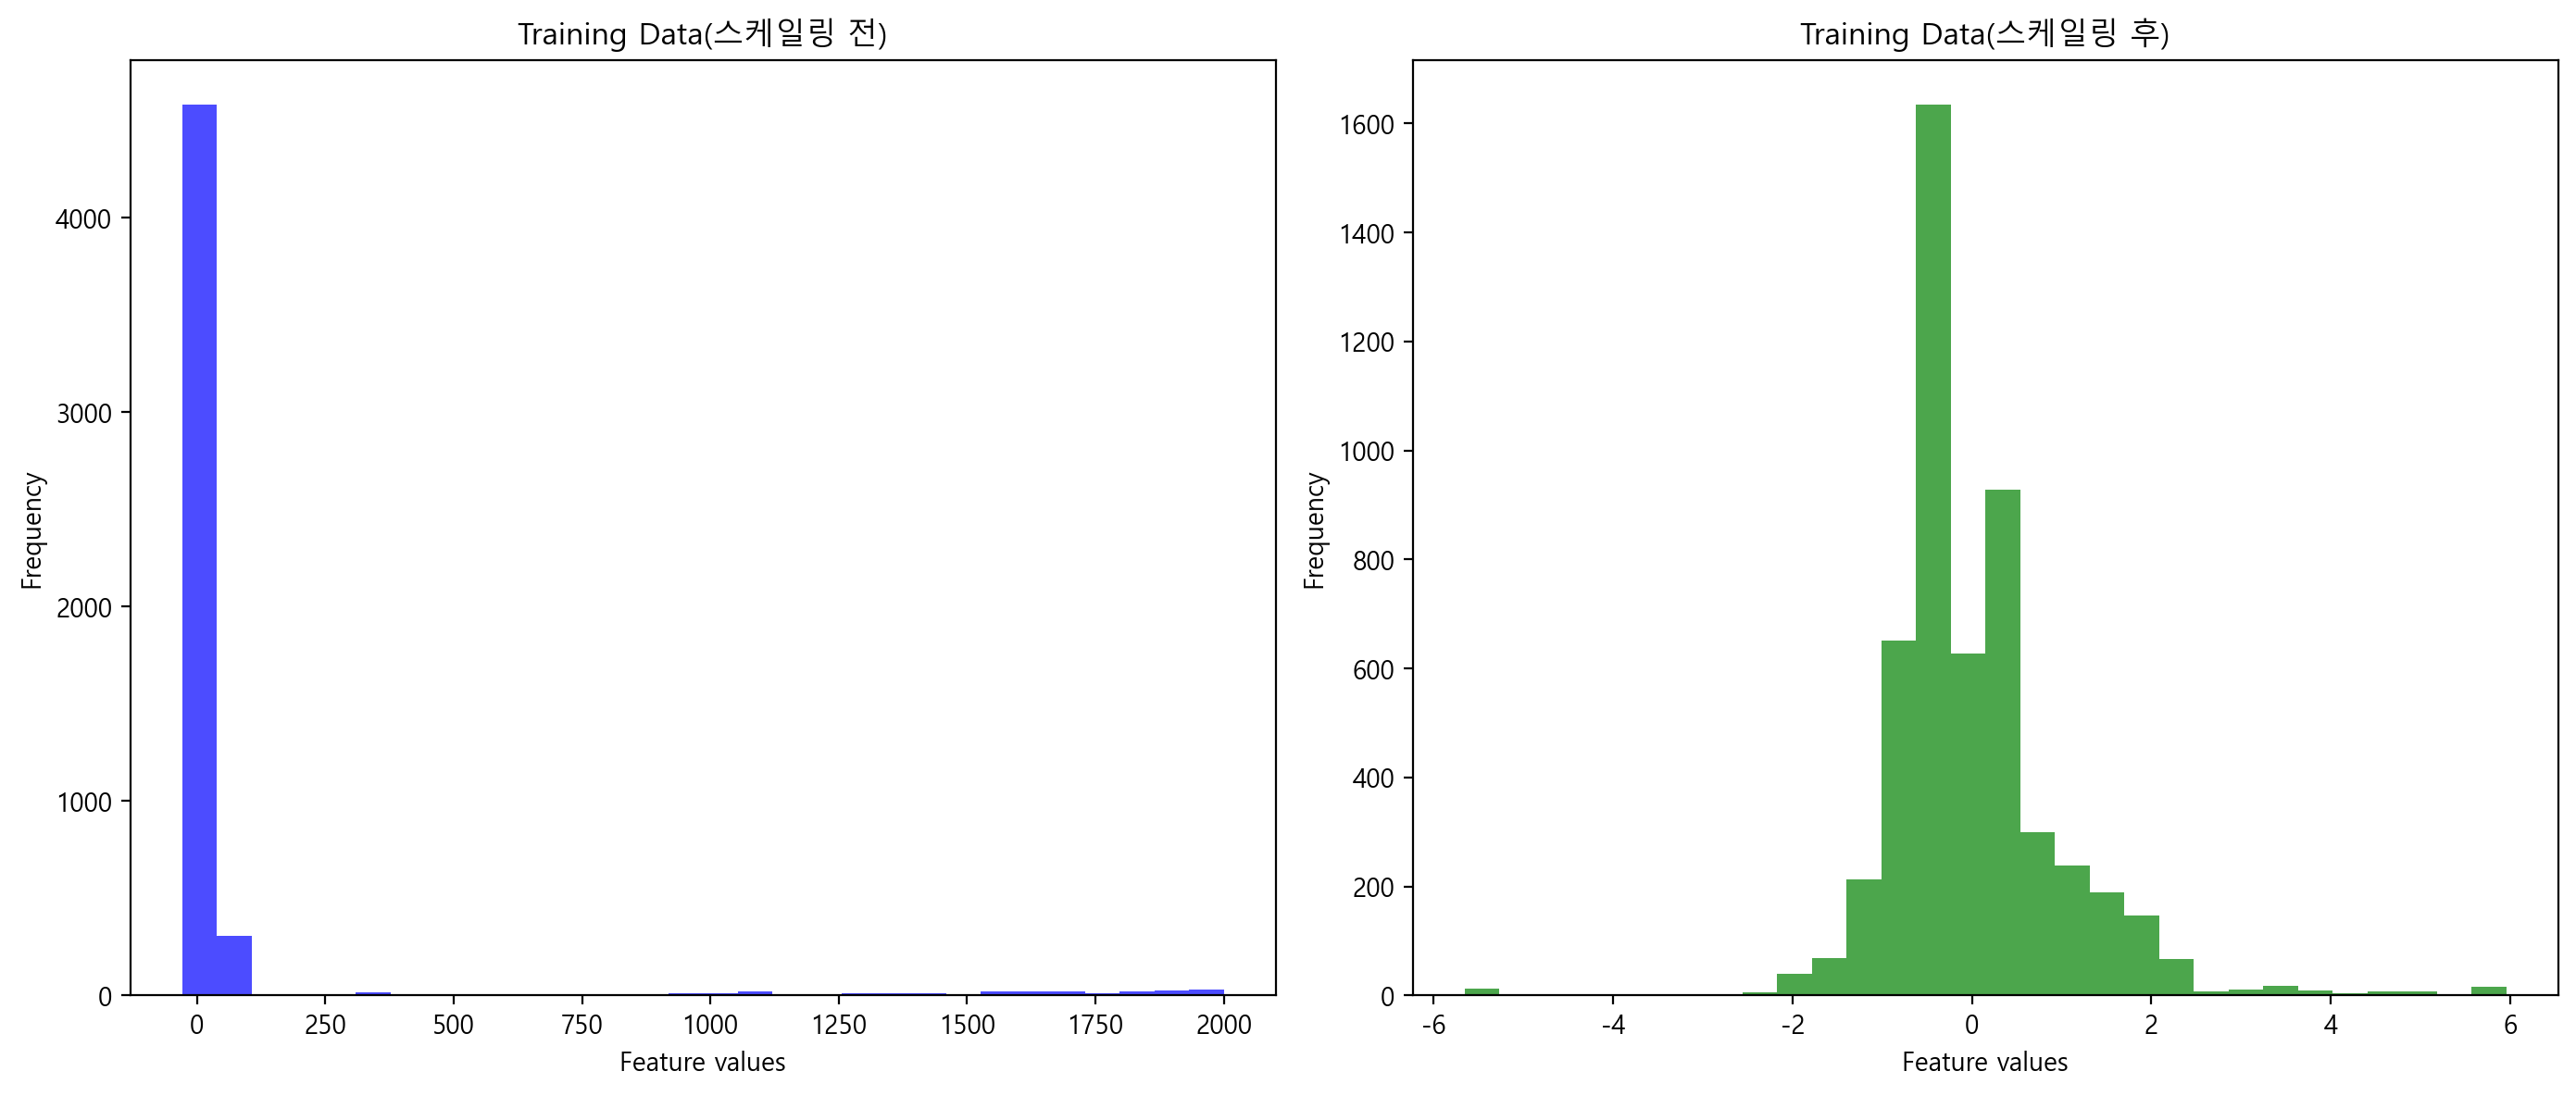

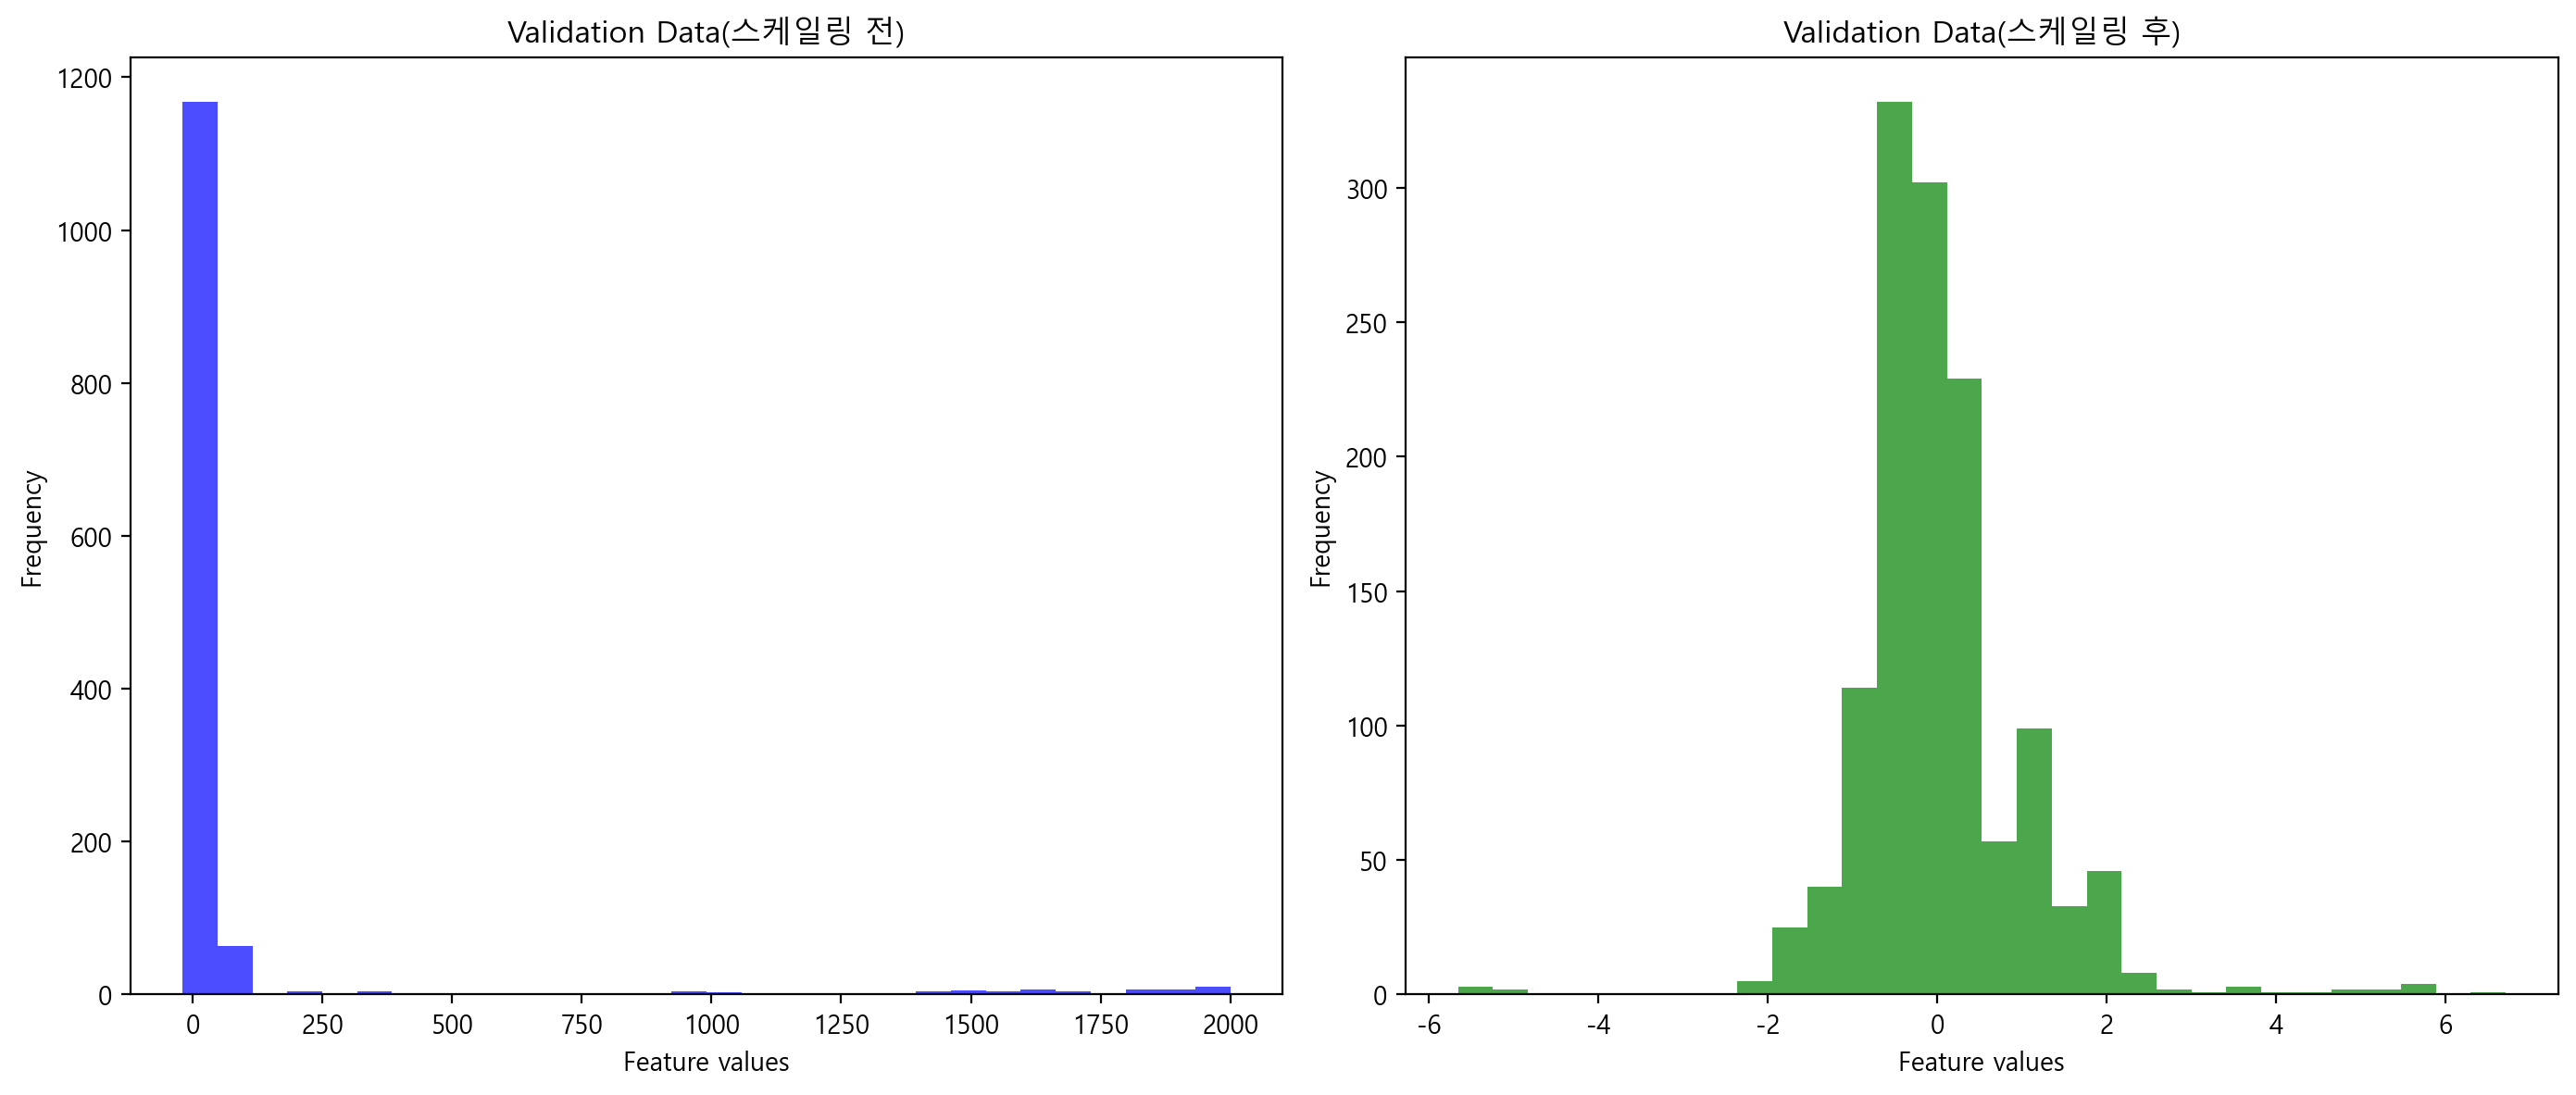

In [614]:
# 스케일링 전 데이터
X_train_before = X_train.values
X_val_before = X_val.values

# 스케일링 전후 데이터 비교를 위한 히스토그램 생성 함수
def plot_histograms(data_before, data_after, title_before, title_after):
    plt.figure(figsize=(14, 6))

    plt.subplot(1, 2, 1)
    plt.hist(data_before.ravel(), bins=30, color='blue', alpha=0.7)
    plt.title(title_before)
    plt.xlabel('Feature values')
    plt.ylabel('Frequency')

    plt.subplot(1, 2, 2)
    plt.hist(data_after.ravel(), bins=30, color='green', alpha=0.7)
    plt.title(title_after)
    plt.xlabel('Feature values')
    plt.ylabel('Frequency')

    plt.tight_layout()
    plt.show()

# 학습 데이터 스케일링 전후 비교
plot_histograms(X_train_before, X_train_ss, 'Training Data(스케일링 전)', 'Training Data(스케일링 후)')
# 검증 데이터 스케일링 전후 비교
plot_histograms(X_val_before, X_val_ss, 'Validation Data(스케일링 전)', 'Validation Data(스케일링 후)')

#### 정규성 검사

In [615]:
from scipy.stats import shapiro

In [616]:
# 정규성 검사를 위한 함수
def test_normality(data, title):
    stat, p = shapiro(data.ravel())
    print(f'{title}')
    print(f'  Statistics={stat:.3f}, p={p:.3e}')
    if p > 0.05:
        print(f'  결과: 정규분포 (fail to reject H0)\n')
    else:
        print(f'  결과: 정규분포가 아님 (reject H0)\n')

In [617]:
# 정규성 검사
print("정규성 검사 결과:")

print("<Train Data>")
test_normality(X_train_before, 'Training Data(스케일링 전)')
test_normality(X_train_ss, 'Training Data(스케일링 후)')

print("<Validation Data>")
test_normality(X_val_before, 'Validation Data(스케일링 전)')
test_normality(X_val_ss, 'Validation Data(스케일링 후)')

정규성 검사 결과:
<Train Data>
Training Data(스케일링 전)
  Statistics=0.272, p=1.400e-89
  결과: 정규분포가 아님 (reject H0)

Training Data(스케일링 후)
  Statistics=0.859, p=4.941e-56
  결과: 정규분포가 아님 (reject H0)

<Validation Data>
Validation Data(스케일링 전)
  Statistics=0.267, p=8.396e-58
  결과: 정규분포가 아님 (reject H0)

Validation Data(스케일링 후)
  Statistics=0.858, p=7.587e-33
  결과: 정규분포가 아님 (reject H0)



c:\Users\pro_1030\Desktop\비어플\.venv\Lib\site-packages\scipy\stats\_axis_nan_policy.py:573: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 5216.
  res = hypotest_fun_out(*samples, **kwds)


- 정규성을 시각적으로 평가하기 위해 QQ플롯을 사용

In [618]:
import scipy.stats as stats

In [619]:
# QQ 플롯을 그리는 함수
def plot_qq(data, title):
    plt.figure(figsize=(8, 4))
    stats.probplot(data.ravel(), dist="norm", plot=plt)
    plt.title(f'QQ Plot - {title}')
    plt.xlabel('Theoretical Quantiles')
    plt.ylabel('Sample Quantiles')
    plt.grid(True)
    plt.show()

정규성 검사를 위한 QQ 플롯:

<Train Data>


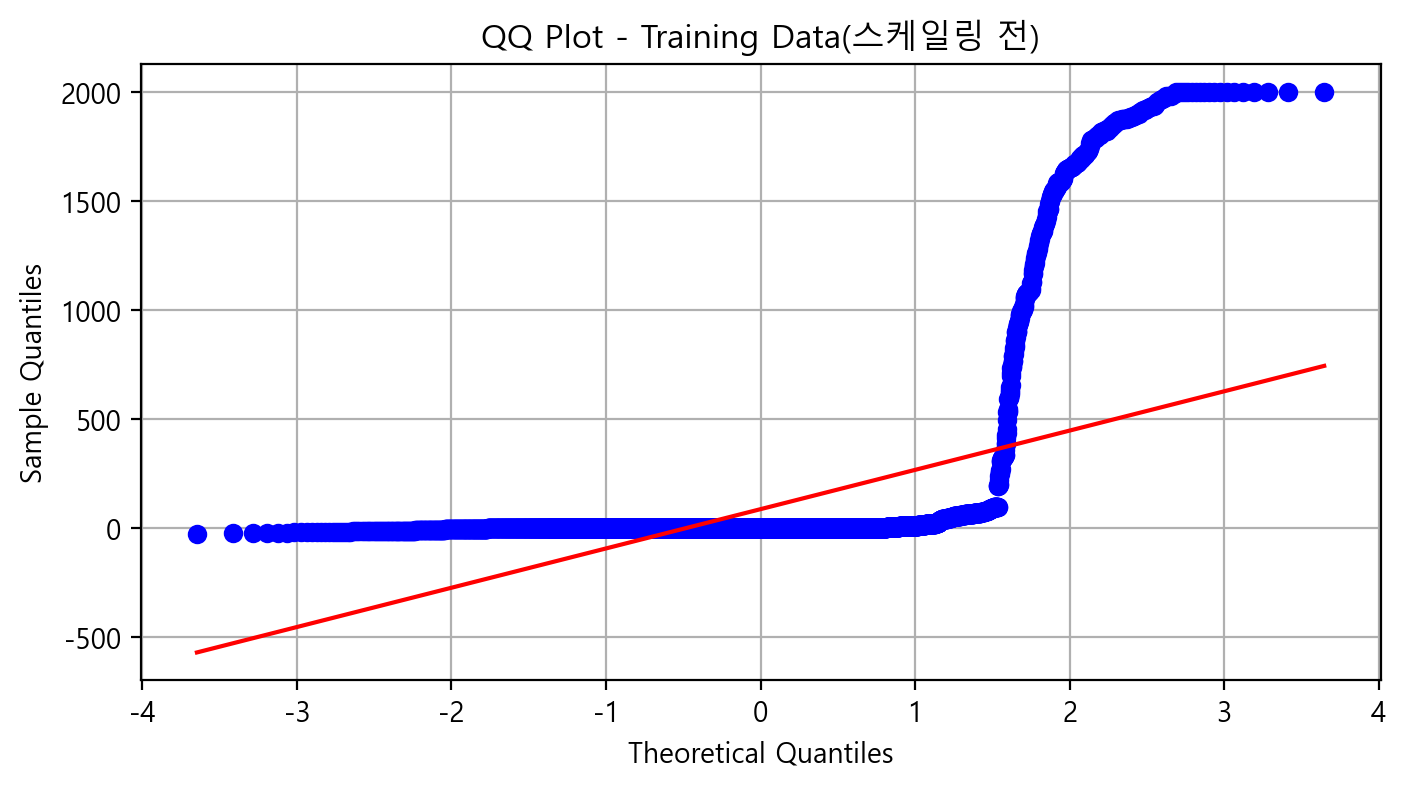

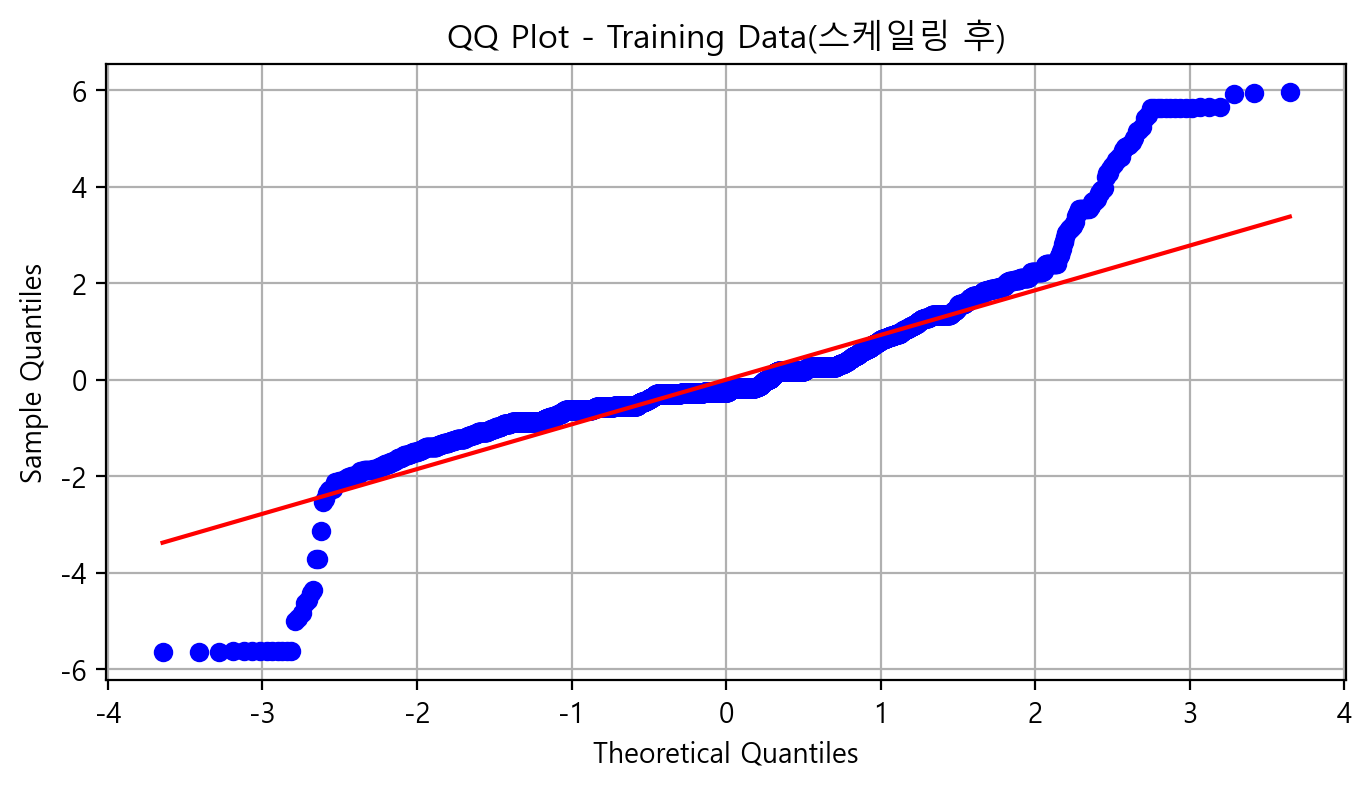

<Validation Data>


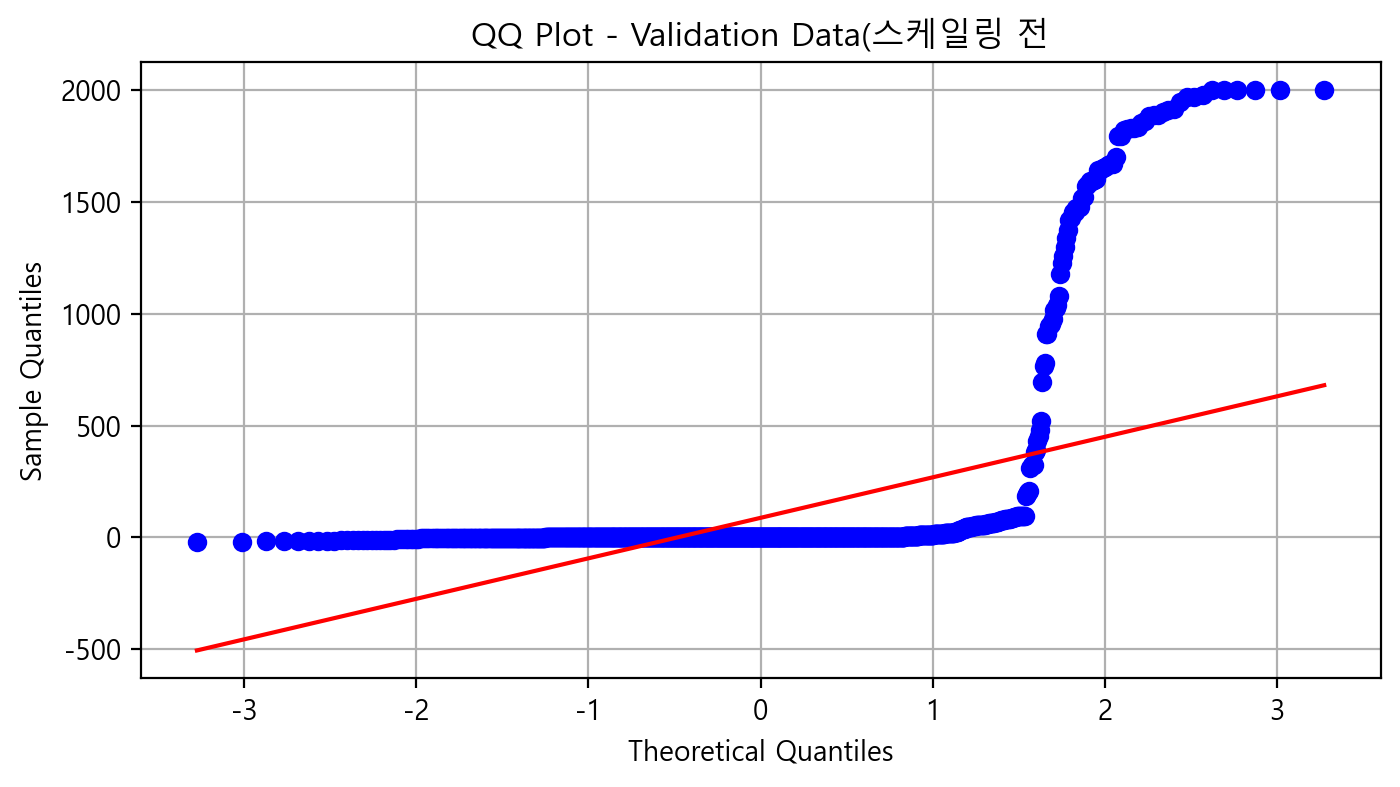

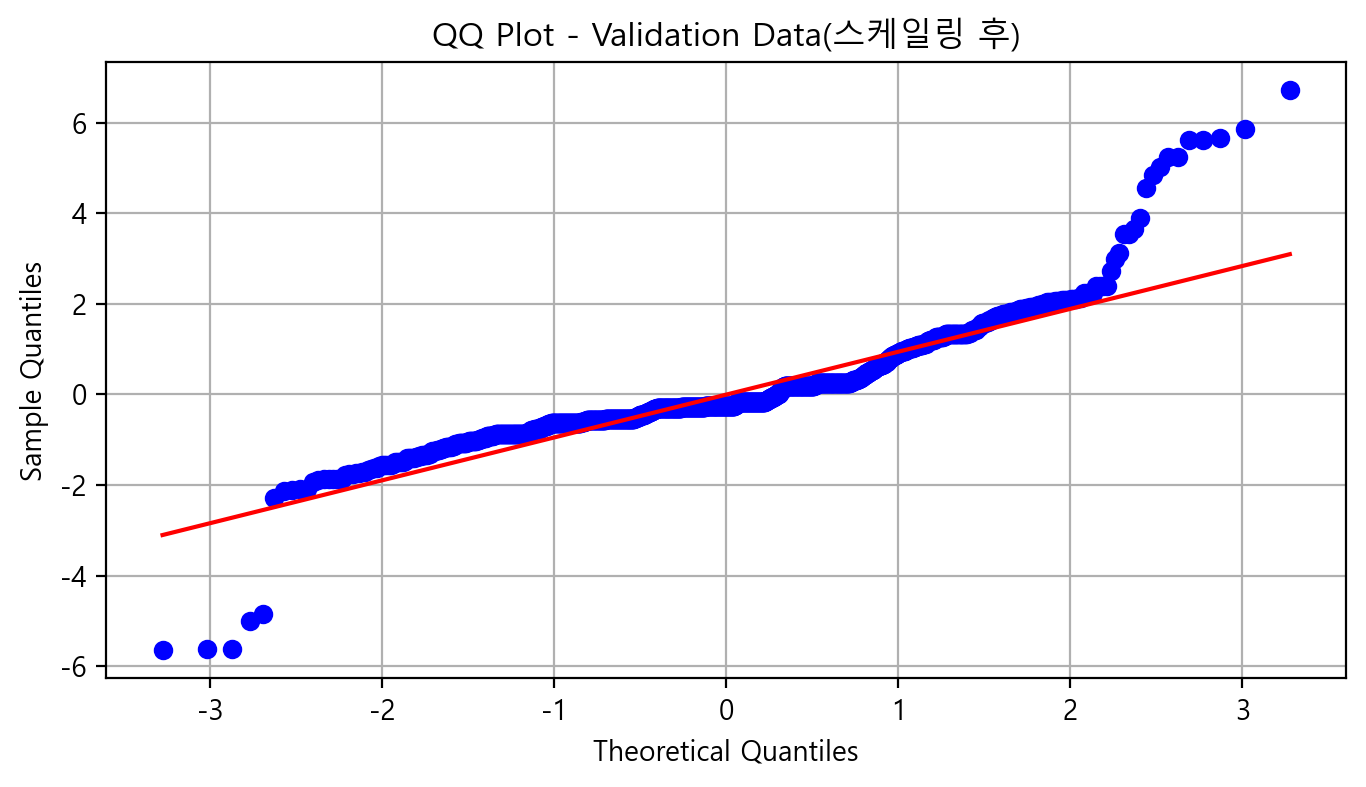

In [620]:
# 스케일링 전후 데이터를 위한 QQ 플롯 그리기
print("정규성 검사를 위한 QQ 플롯:\n")

print("<Train Data>")
plot_qq(X_train_before, 'Training Data(스케일링 전)')
plot_qq(X_train_ss, 'Training Data(스케일링 후)')

print("<Validation Data>")
plot_qq(X_val_before, 'Validation Data(스케일링 전')
plot_qq(X_val_ss, 'Validation Data(스케일링 후)')

- 4가지 경우 모두 정규성을 만족하지 않지만 스케일링 후 조금 더 정규분포와 유사해졌음을 확인할 수 있다.

In [621]:
# 평균과 표준편차 계산 함수
def print_stats(data, title):
    mean = np.mean(data)
    std = np.std(data)
    print(f'{title} - Mean: {mean}, Std: {std}')

In [622]:
print_stats(X_train_before, 'Training Data(스케일링 전)')
print_stats(X_train_ss, 'Training Data(스케일링 후)')

Training Data(스케일링 전) - Mean: 87.43743580468828, Std: 345.89974769684017
Training Data(스케일링 후) - Mean: 2.7329876603119267e-17, Std: 1.0


In [623]:
print_stats(X_val_before, '스케일링 전 검증 데이터')
print_stats(X_val_ss, '스케일링 후 검증 데이터')

스케일링 전 검증 데이터 - Mean: 87.47048153218029, Std: 350.66316783872077
스케일링 후 검증 데이터 - Mean: -0.005437281265642415, Std: 1.021686998065194


- 둘다 정규분포를 만족하지는 않지만 히스토그램을 보면 스케일링 전보다 스케일링 후 0에 더 집중되는 경향이 생기고 전체 데이터의 범위가 압축되었음(분산)을 확인할 수 있다.

#### 다중공선성 확인

In [624]:
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [625]:
# 독립 변수 데이터
X_vif = X_train.values

# VIF 계산을 위해 상수항 추가
X_with_const = sm.add_constant(X_vif)

# VIF 계산 함수
def calculate_vif(X):
    vif_data = pd.DataFrame()
    vif_data["feature"] = range(X.shape[1])
    vif_data["VIF"] = [variance_inflation_factor(X, i) for i in range(X.shape[1])]
    return vif_data

# VIF 계산
vif_data = calculate_vif(X_with_const)

# 상수항을 제외한 VIF 값 출력
vif_data = vif_data.iloc[1:]  # 상수항(constant) 열을 제외
vif_data['feature'] = X_train.columns

print(vif_data)

                      feature         VIF
1                        Hour    1.609534
2             Temperature(°C)  338.634209
3                 Humidity(%)   57.285204
4            Wind speed (m/s)    1.812288
5            Visibility (10m)    2.108380
6   Dew point temperature(°C)  489.547489
7     Solar Radiation (MJ/m2)    2.328552
8                Rainfall(mm)    1.780161
9               Snowfall (cm)    1.481106
10             Seasons_Autumn    3.111258
11             Seasons_Summer    4.802799
12             Seasons_Winter    4.299271
13            Holiday_Holiday         inf
14         Holiday_No Holiday         inf
15         Functioning Day_No         inf
16        Functioning Day_Yes         inf


c:\Users\pro_1030\Desktop\비어플\.venv\Lib\site-packages\statsmodels\regression\linear_model.py:1783: RuntimeWarning: divide by zero encountered in scalar divide
  return 1 - self.ssr/self.centered_tss
c:\Users\pro_1030\Desktop\비어플\.venv\Lib\site-packages\statsmodels\stats\outliers_influence.py:197: RuntimeWarning: divide by zero encountered in scalar divide
  vif = 1. / (1. - r_squared_i)


- Temperature(°C)와 Dew point temperature(°C), Humidity(%) 세 변수 간의 강한 다중공선성이 있음을 알 수 있다. (근삿값 공식에 쓰였던 변수들!)
- VIF가 10이상이면 다중공선성이 있다고 판단한다.

- 선형회귀모델에서는 다중공선성을 확인 후 변수 제거 등 처리해주는 게 좋은데 트리모델은 다중공선성의 영향을 거의 받지 않으므로 다중공선성과 관계없이 변수가 적을수록 모델 성능이 높아진다는 것에 유의하여 판단하에 변수를 선택하면 된다.

### MinMax Scaler

In [626]:
#객체 생성
mms = MinMaxScaler()

#학습 및 변환
X_train_mms = mms.fit_transform(X_train)
X_val_mms = mms.transform(X_val)
#X_test_mms = mms.transform(X_test) #test셋이 있는 경우

print("<train 셋>")
print(f'최대: {X_train_mms.max()}\n최소: {X_train_mms.min()}')
print("<valid 셋>")
print(f'최대: {X_val_mms.max()}\n최소: {X_val_mms.min()}')

<train 셋>
최대: 1.0
최소: 0.0
<valid 셋>
최대: 1.158354723957714
최소: -0.0015764582238570676


#### 스케일링 전후 비교

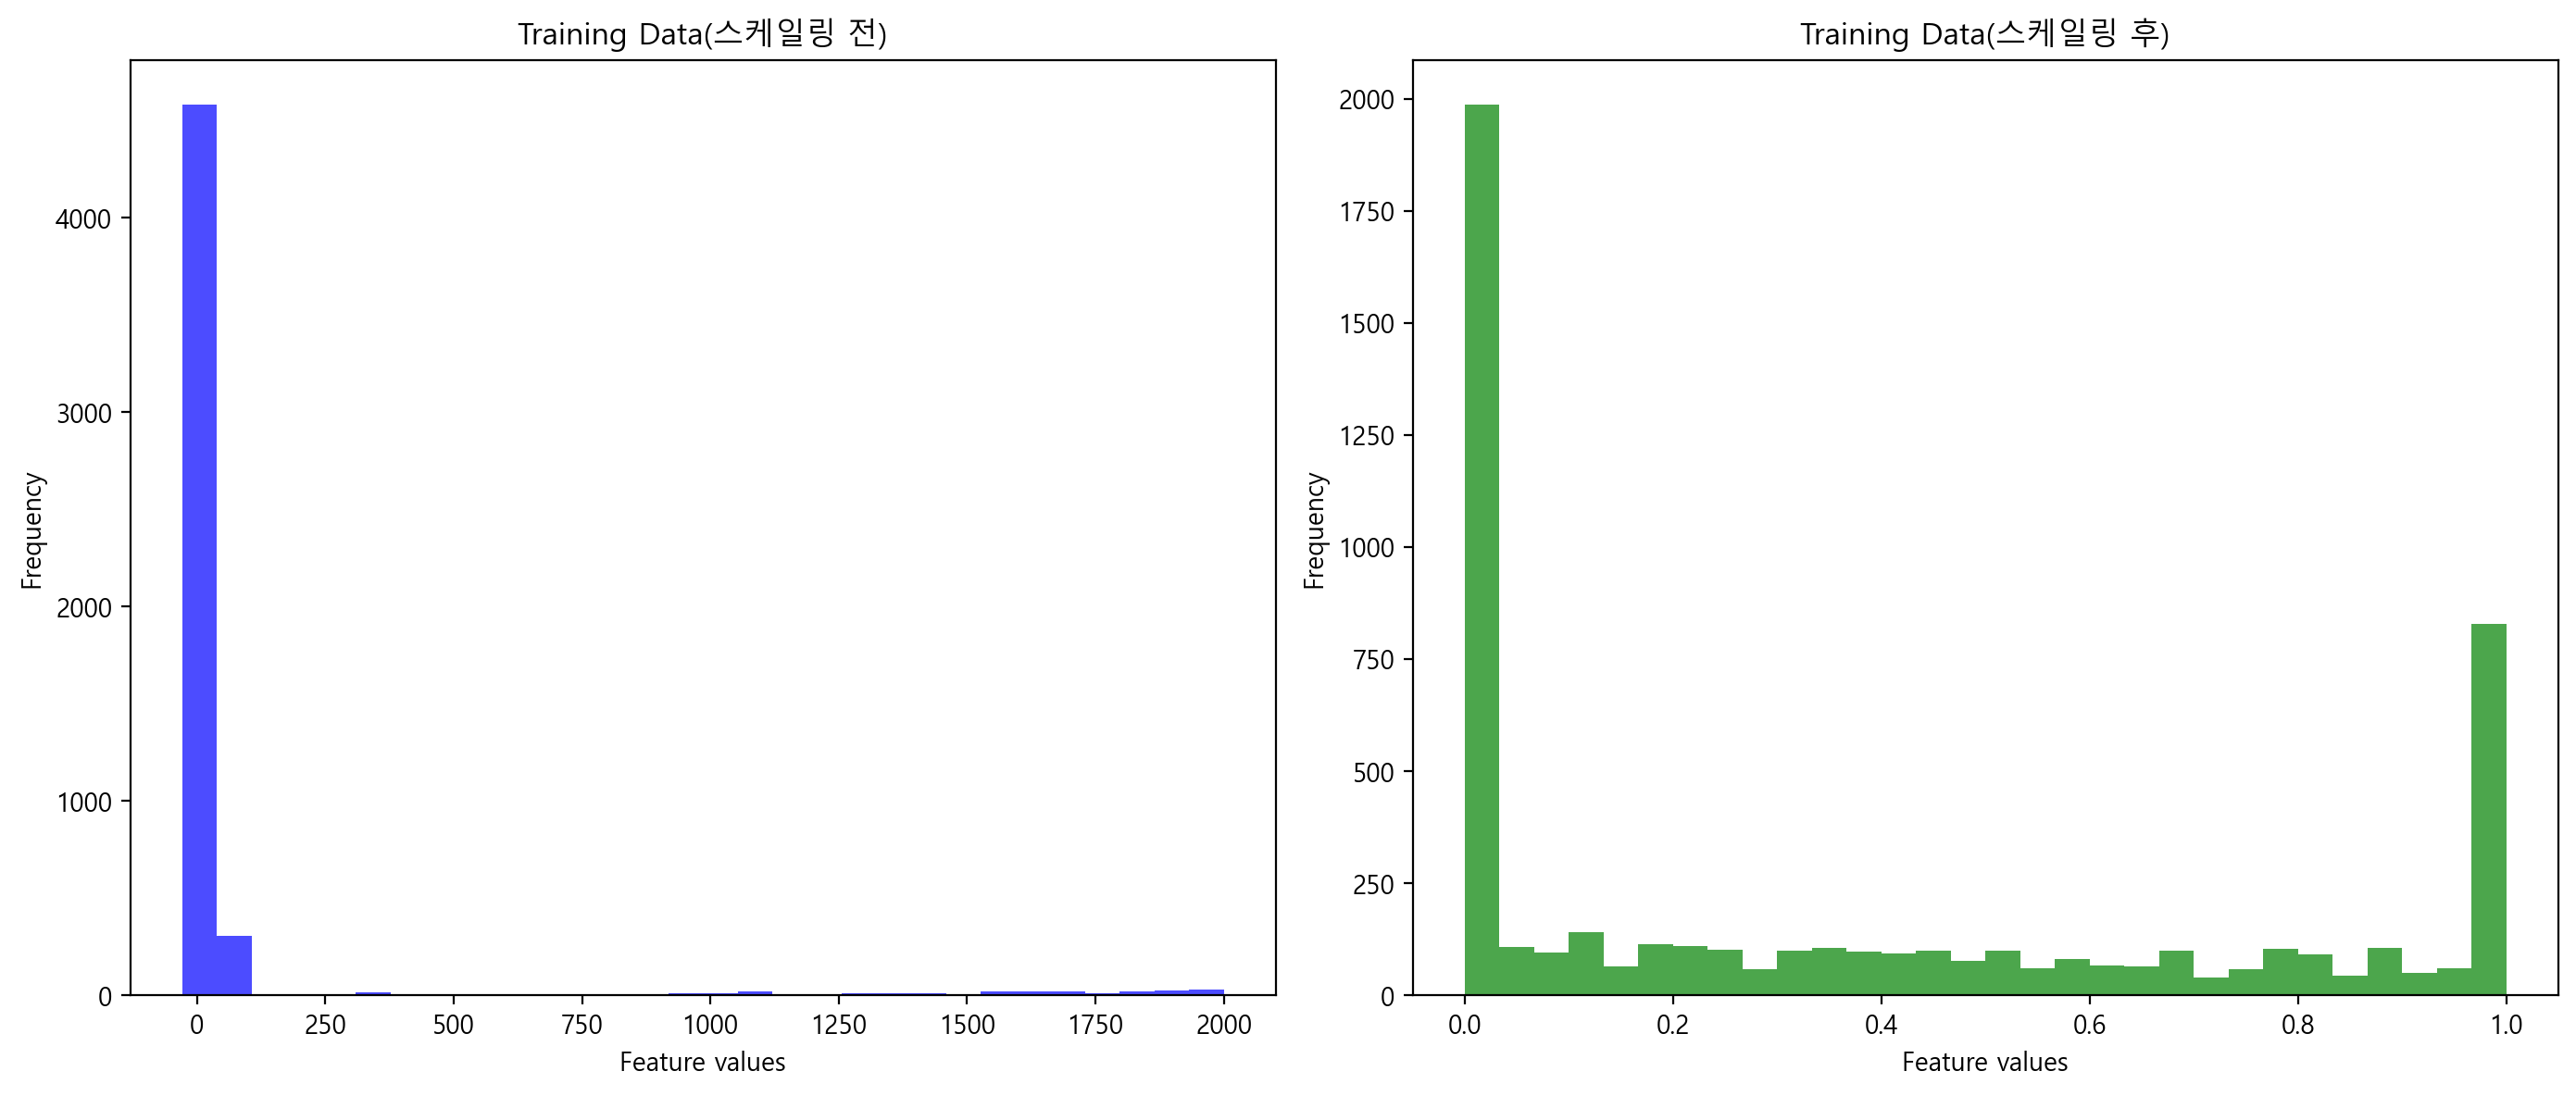

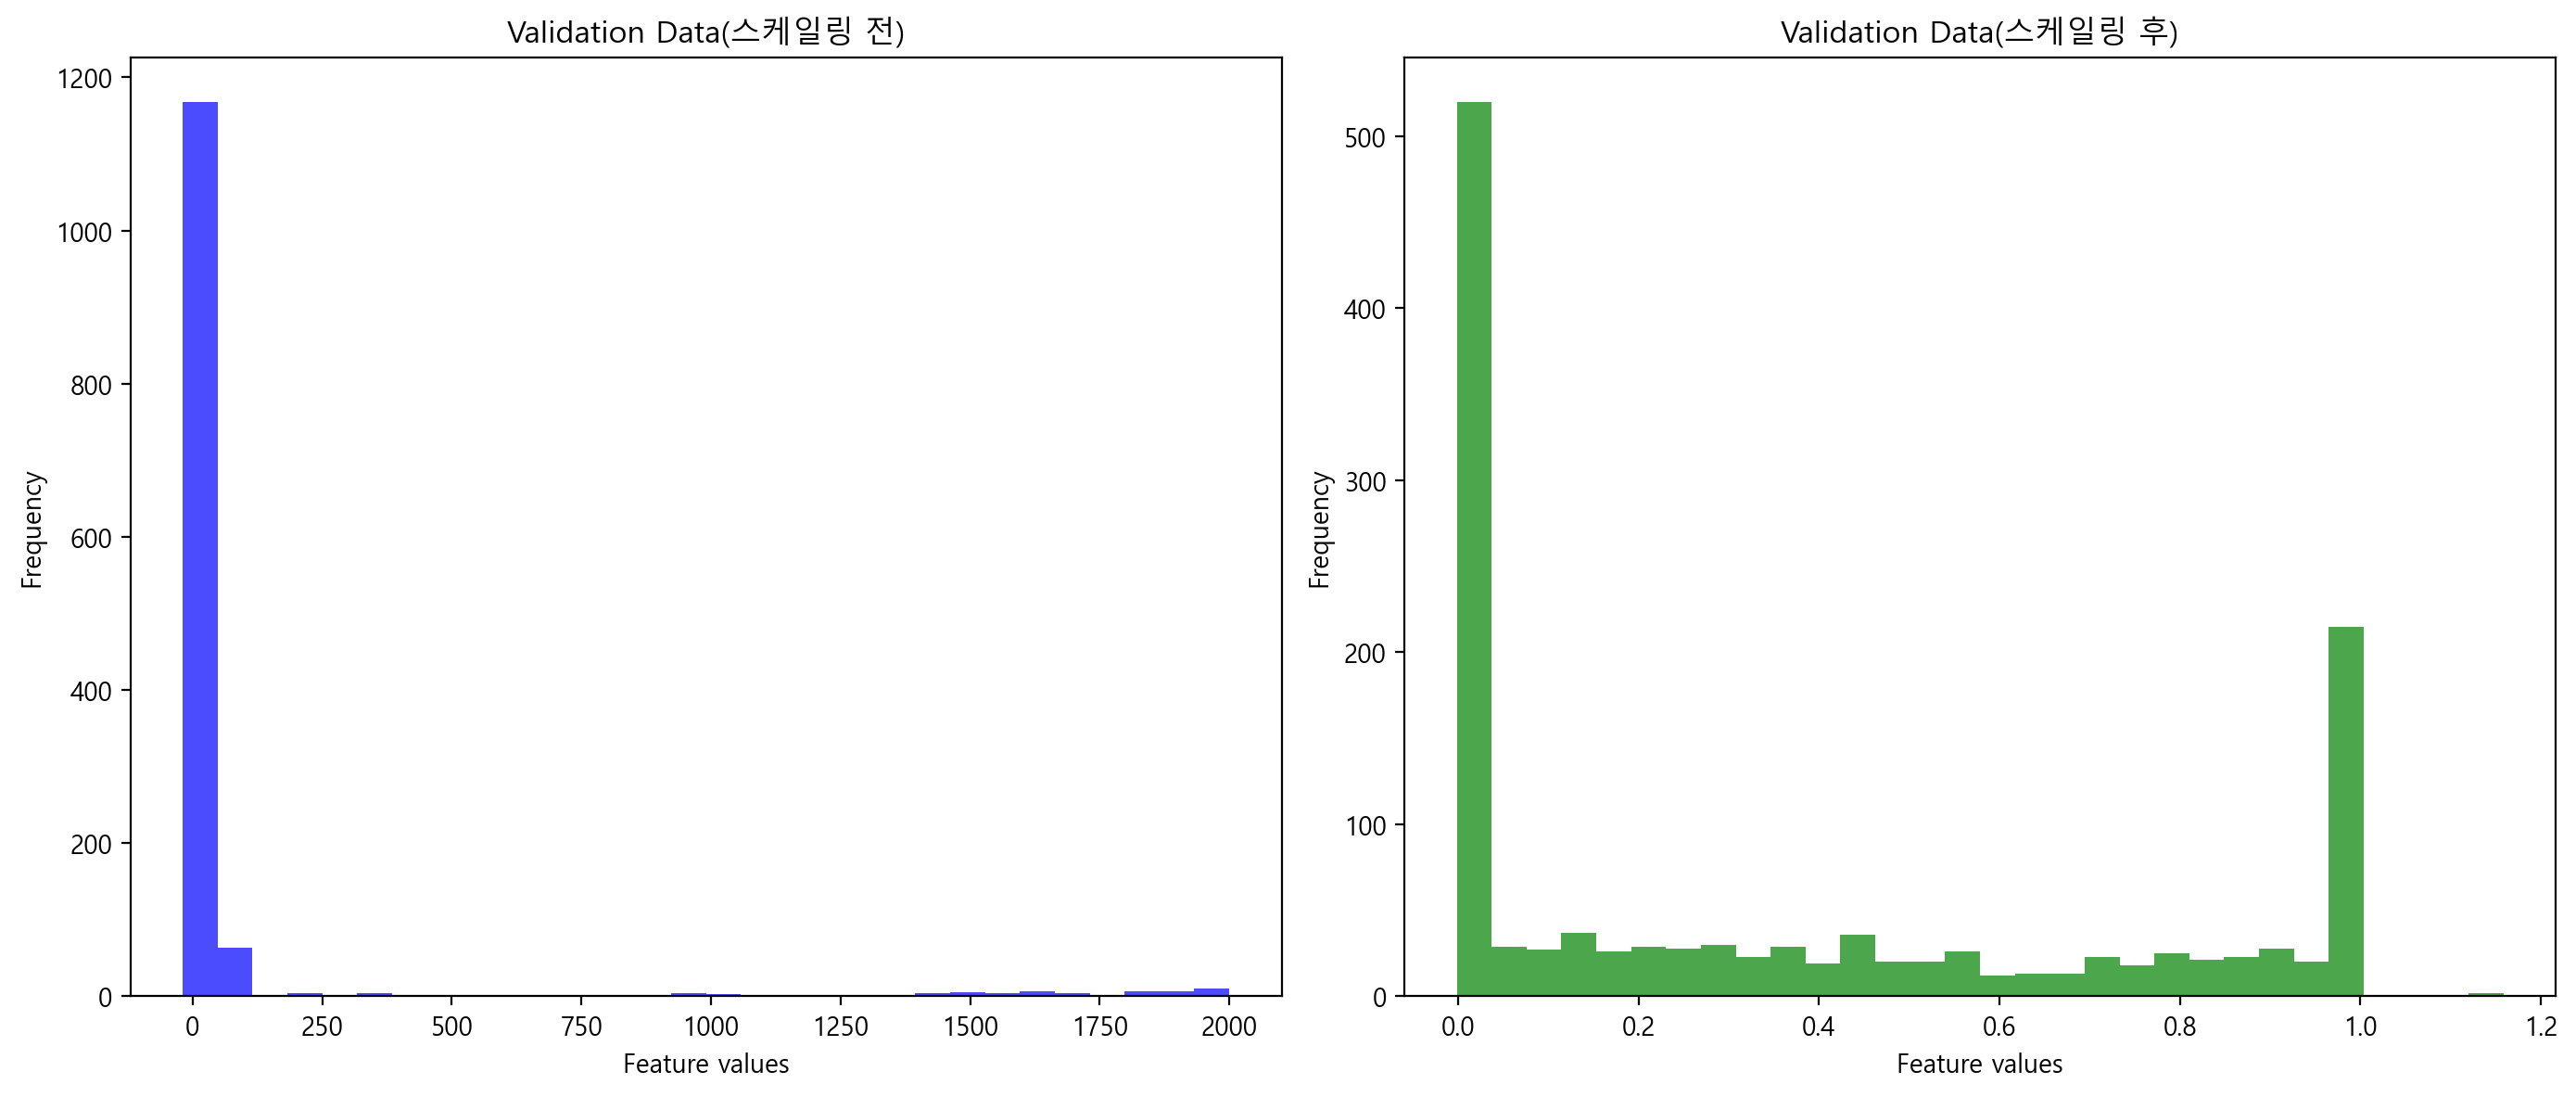

In [627]:
# 학습 데이터 스케일링 전후 비교
plot_histograms(X_train_before, X_train_mms, 'Training Data(스케일링 전)', 'Training Data(스케일링 후)')
# 검증 데이터 스케일링 전후 비교
plot_histograms(X_val_before, X_val_mms, 'Validation Data(스케일링 전)', 'Validation Data(스케일링 후)')

### MaxAbs Scaler

In [628]:
#객체 생성
mas = MaxAbsScaler()

#학습 및 변환
X_train_mas = mas.fit_transform(X_train)
X_val_mas = mas.transform(X_val)
#X_test_mas = mas.transform(X_test) #test셋이 있는 경우

print("<train 셋>")
print(f'최대: {X_train_mas.max()}\n최소: {X_train_mas.min()}')
print("<valid 셋>")
print(f'최대: {X_val_mas.max()}\n최소: {X_val_mas.min()}')

<train 셋>
최대: 1.0
최소: -1.0
<valid 셋>
최대: 1.1969089883533444
최소: -0.786649520692074


#### 스케일링 전후 비교

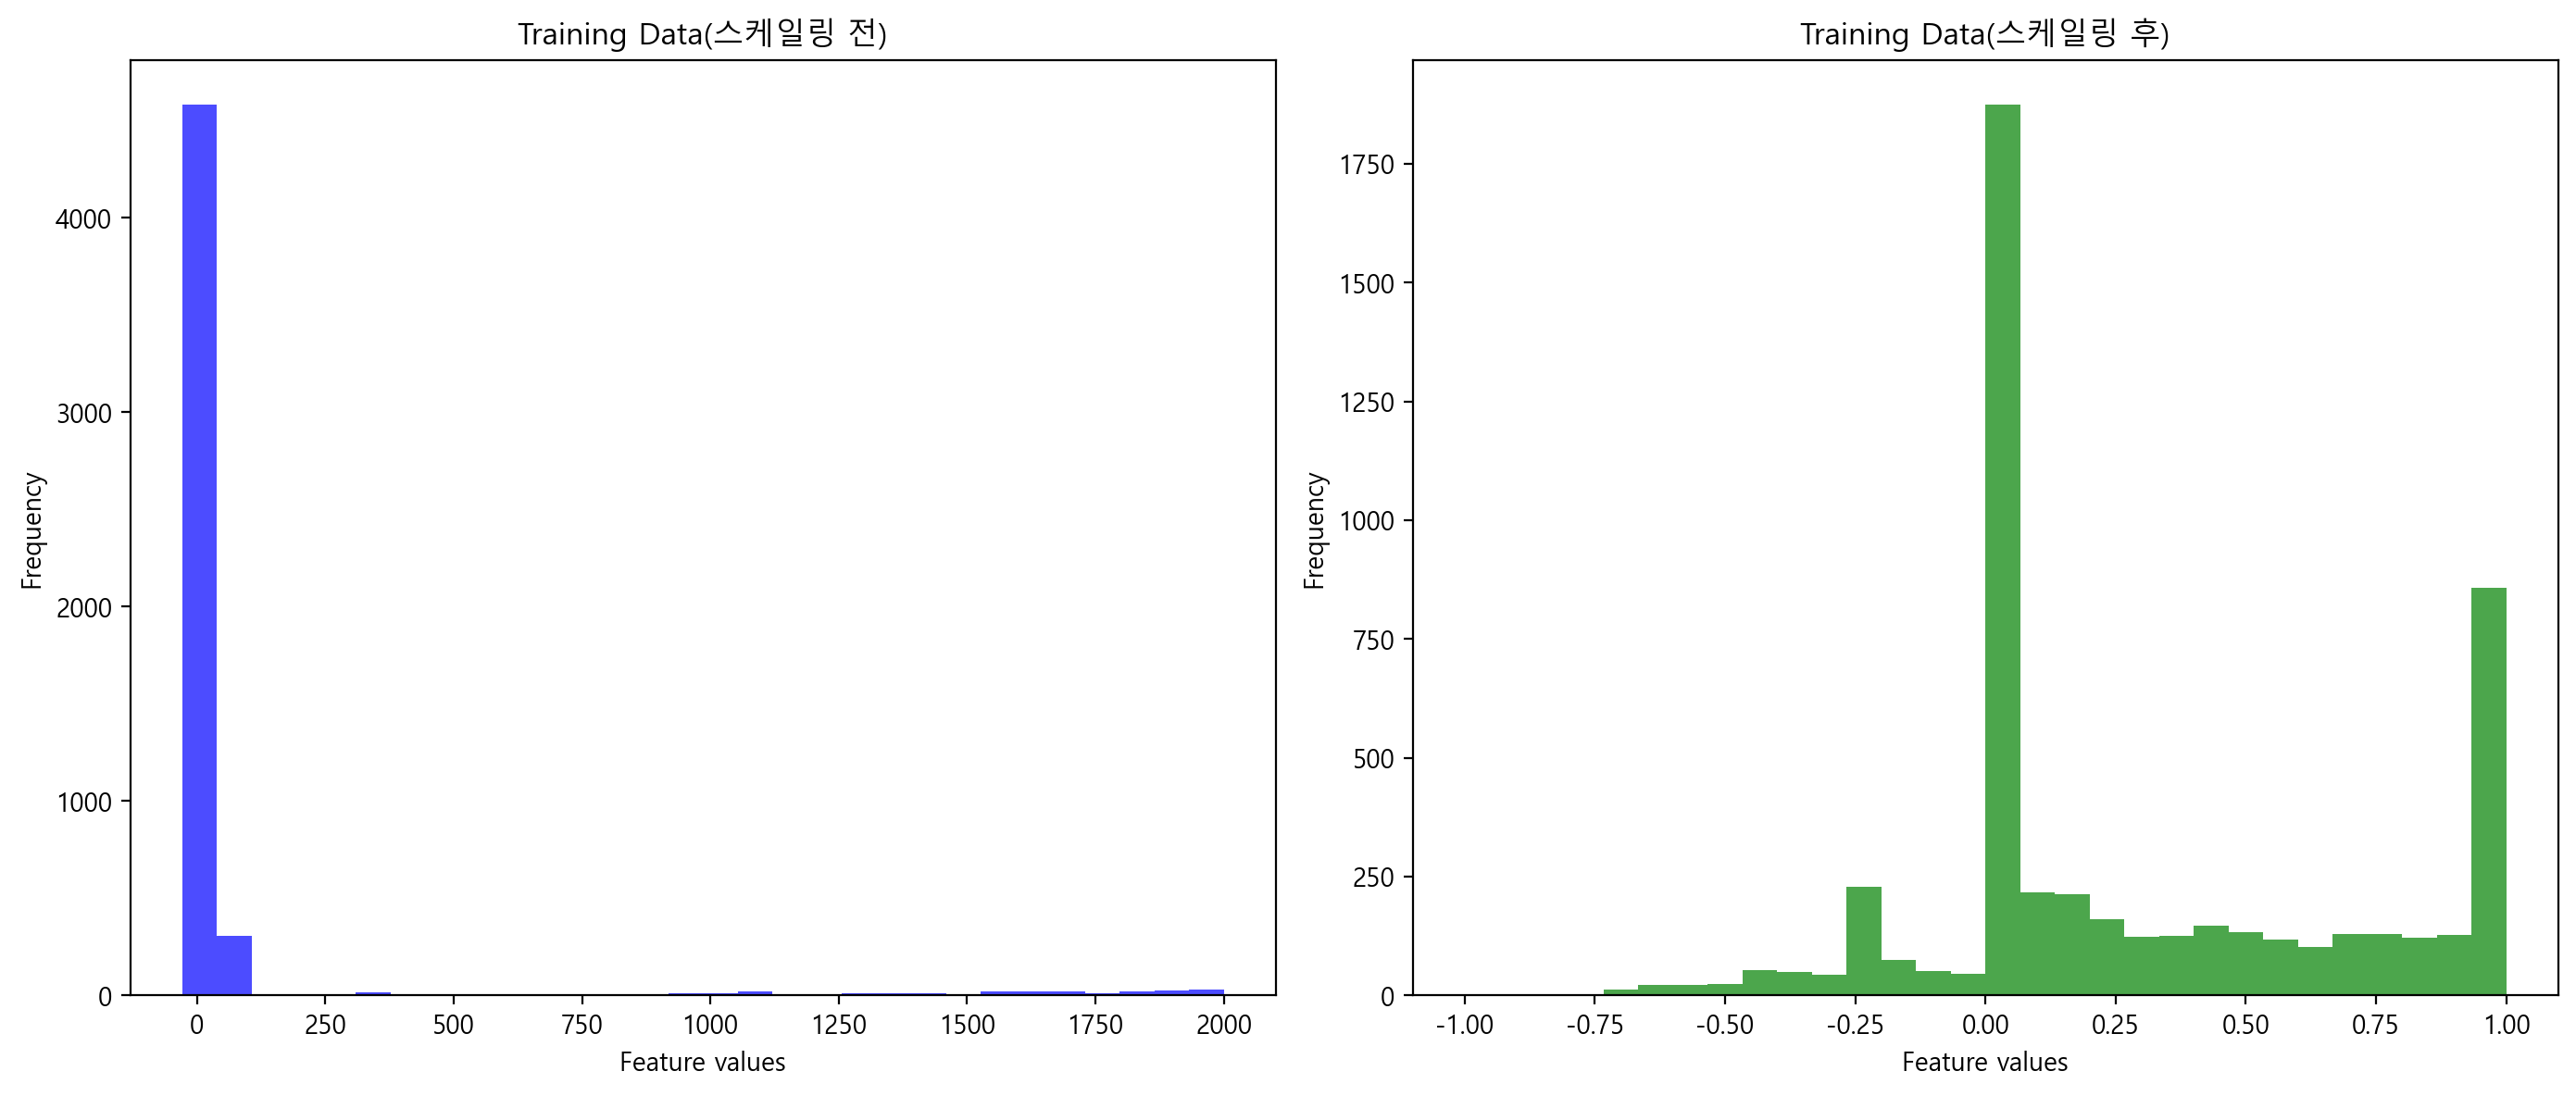

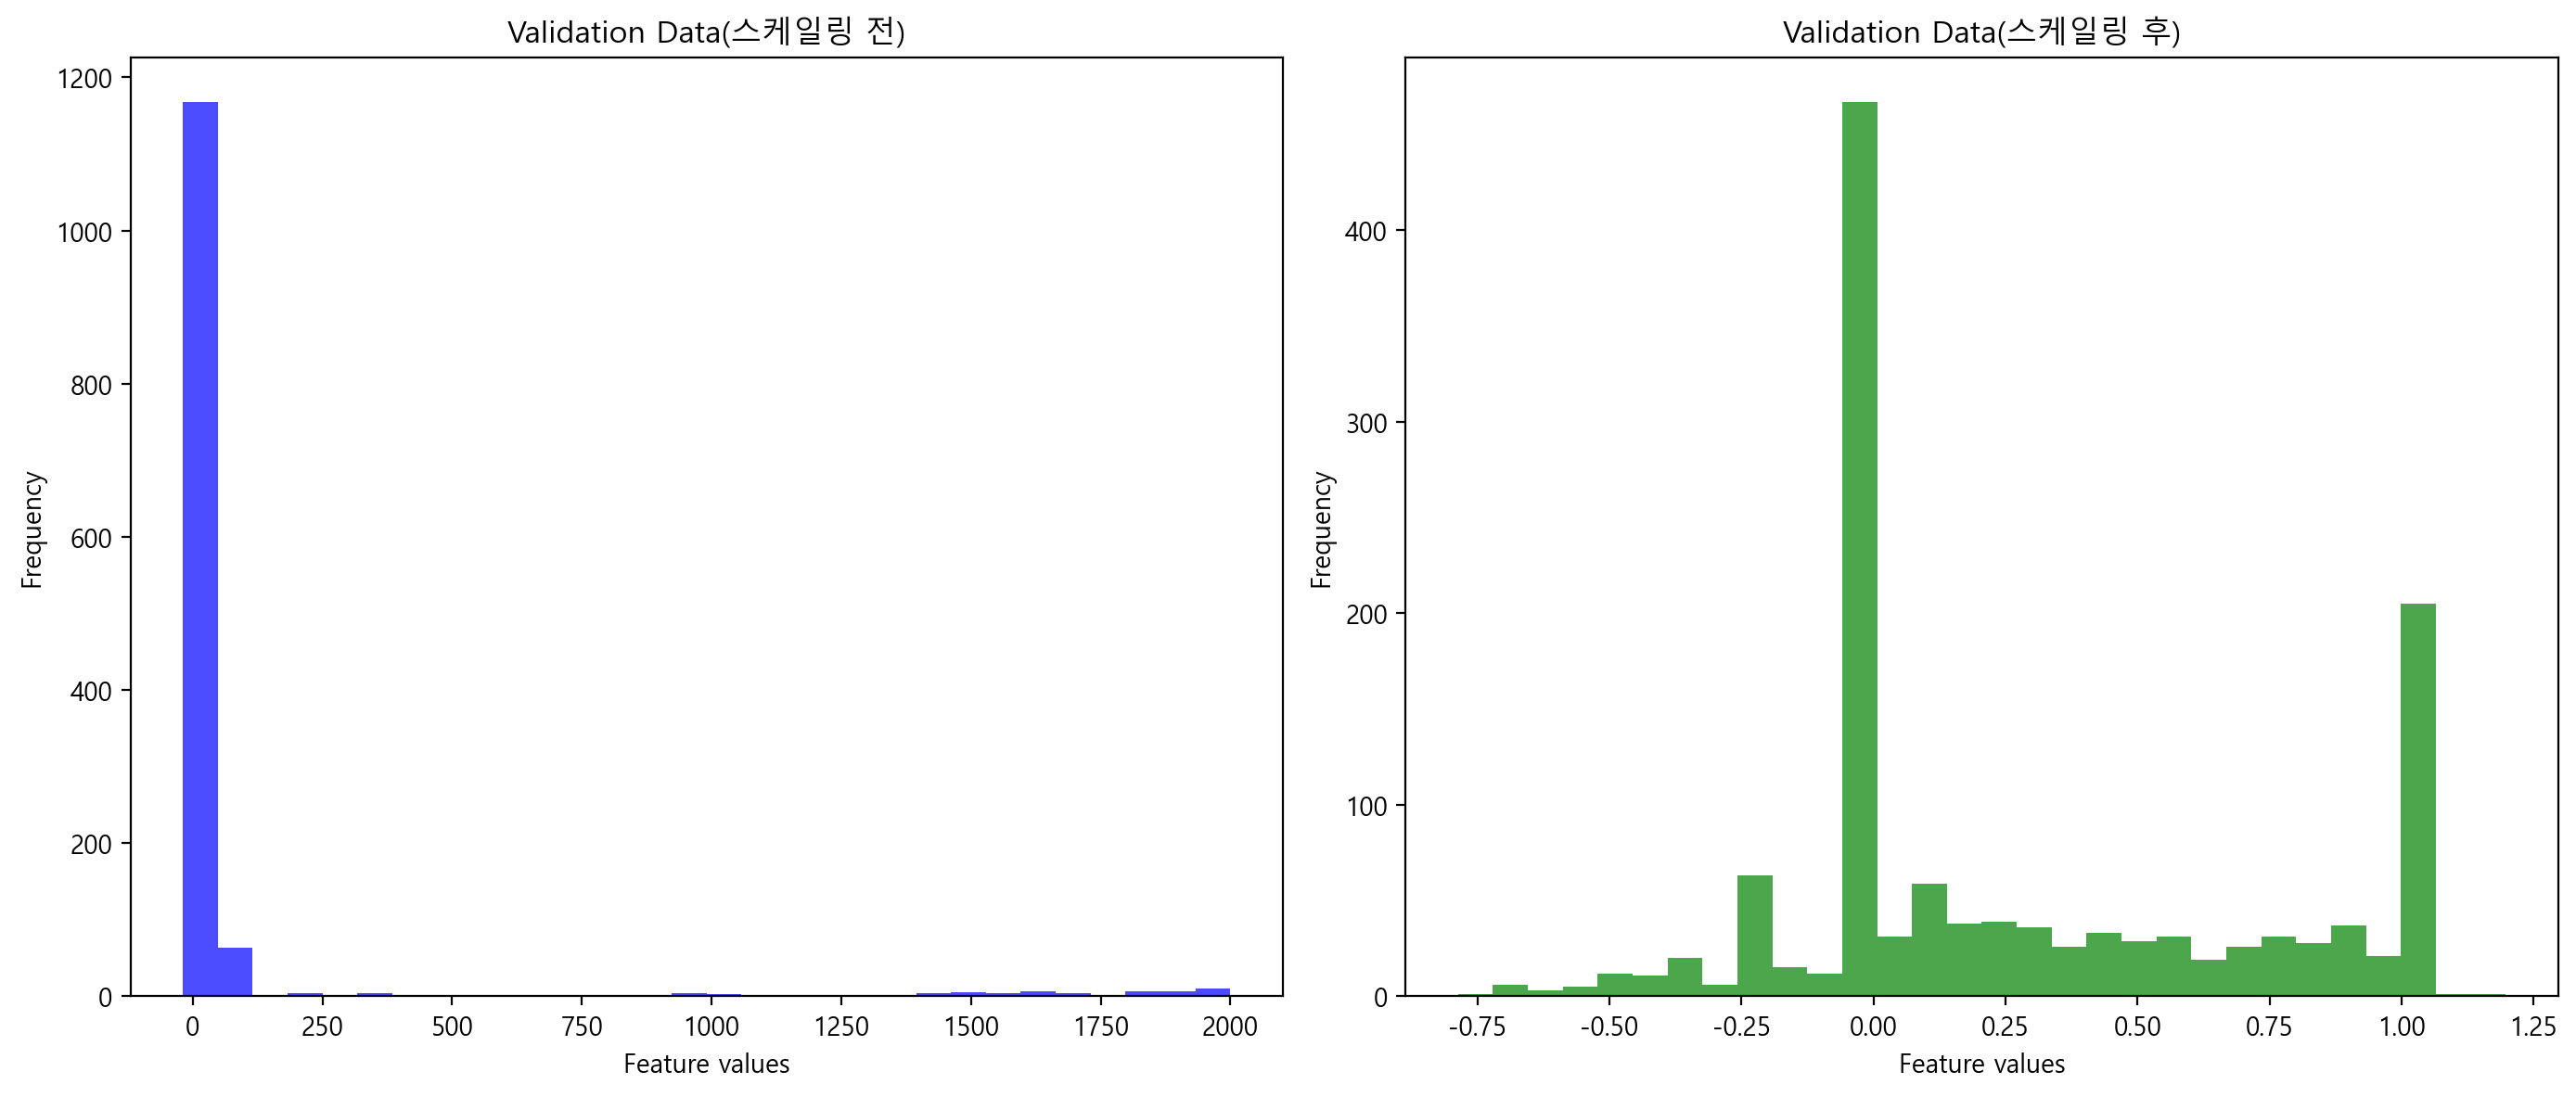

In [629]:
# 학습 데이터 스케일링 전후 비교
plot_histograms(X_train_before, X_train_mas, 'Training Data(스케일링 전)', 'Training Data(스케일링 후)')
# 검증 데이터 스케일링 전후 비교
plot_histograms(X_val_before, X_val_mas, 'Validation Data(스케일링 전)', 'Validation Data(스케일링 후)')

### Robust Scaler

In [630]:
#객체 생성
rs = RobustScaler()

#학습 및 변환
X_train_rs = rs.fit_transform(X_train)
X_val_rs = rs.transform(X_val)
#X_test_rs = rs.transform(X_test) #test셋이 있는 경우

print("<train 셋>")
print(f'평균: {X_train_rs.mean()}\n분산: {X_train_rs.std()}')
print("<valid 셋>")
print(f'평균: {X_val_rs.mean()}\n분산: {X_val_rs.std()}')

<train 셋>
평균: 0.24587651998902255
분산: 1.0313488397679604
<valid 셋>
평균: 0.23970054975742489
분산: 1.061067347963051


#### 스케일링 전후 비교

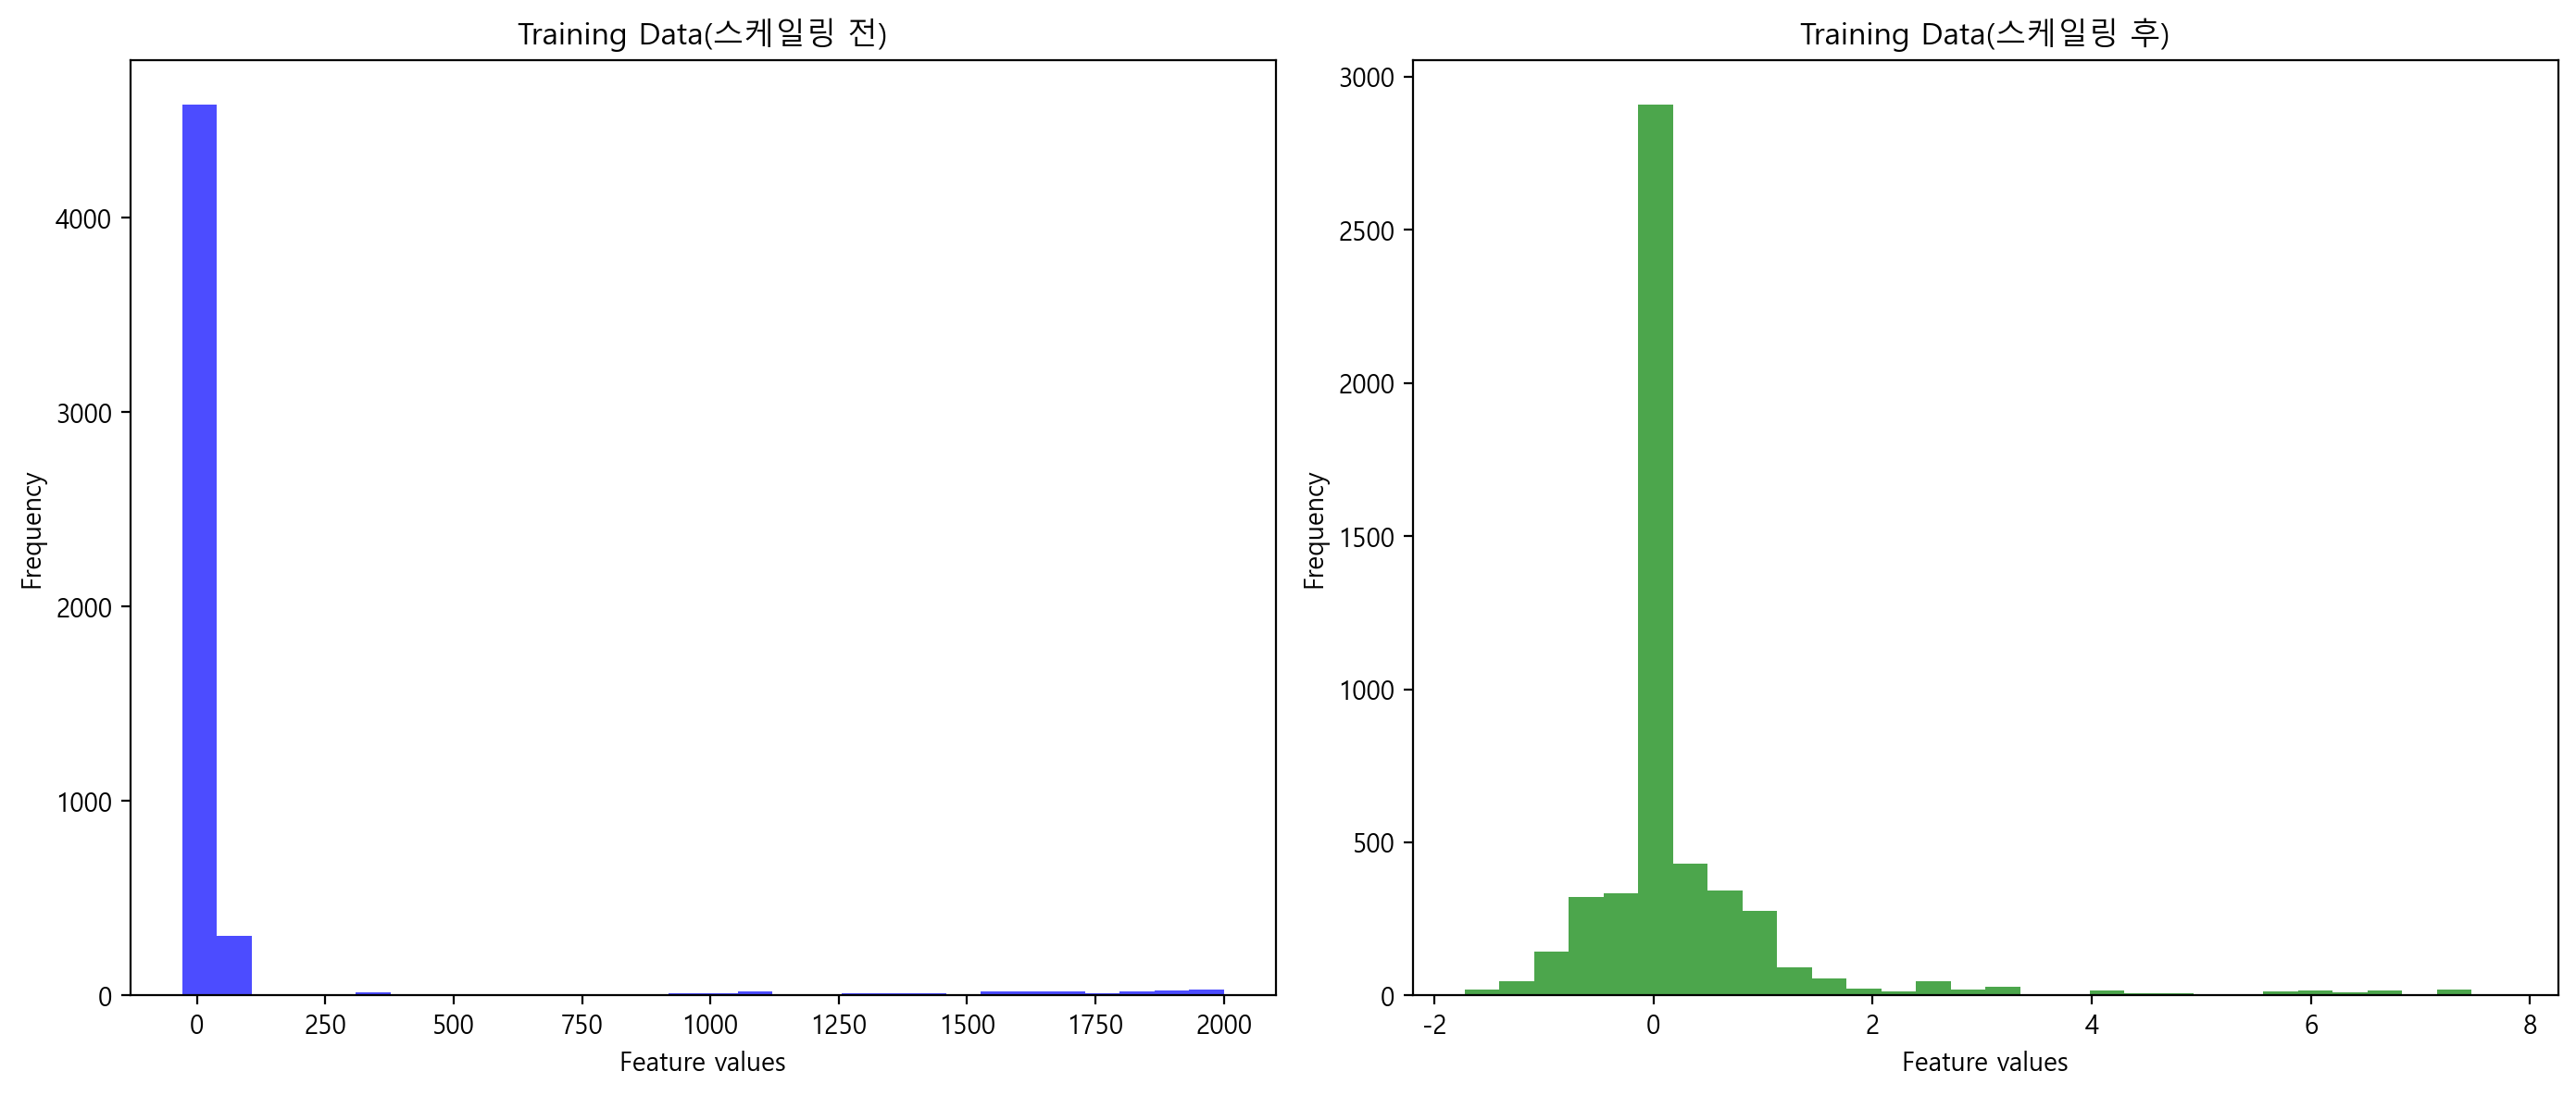

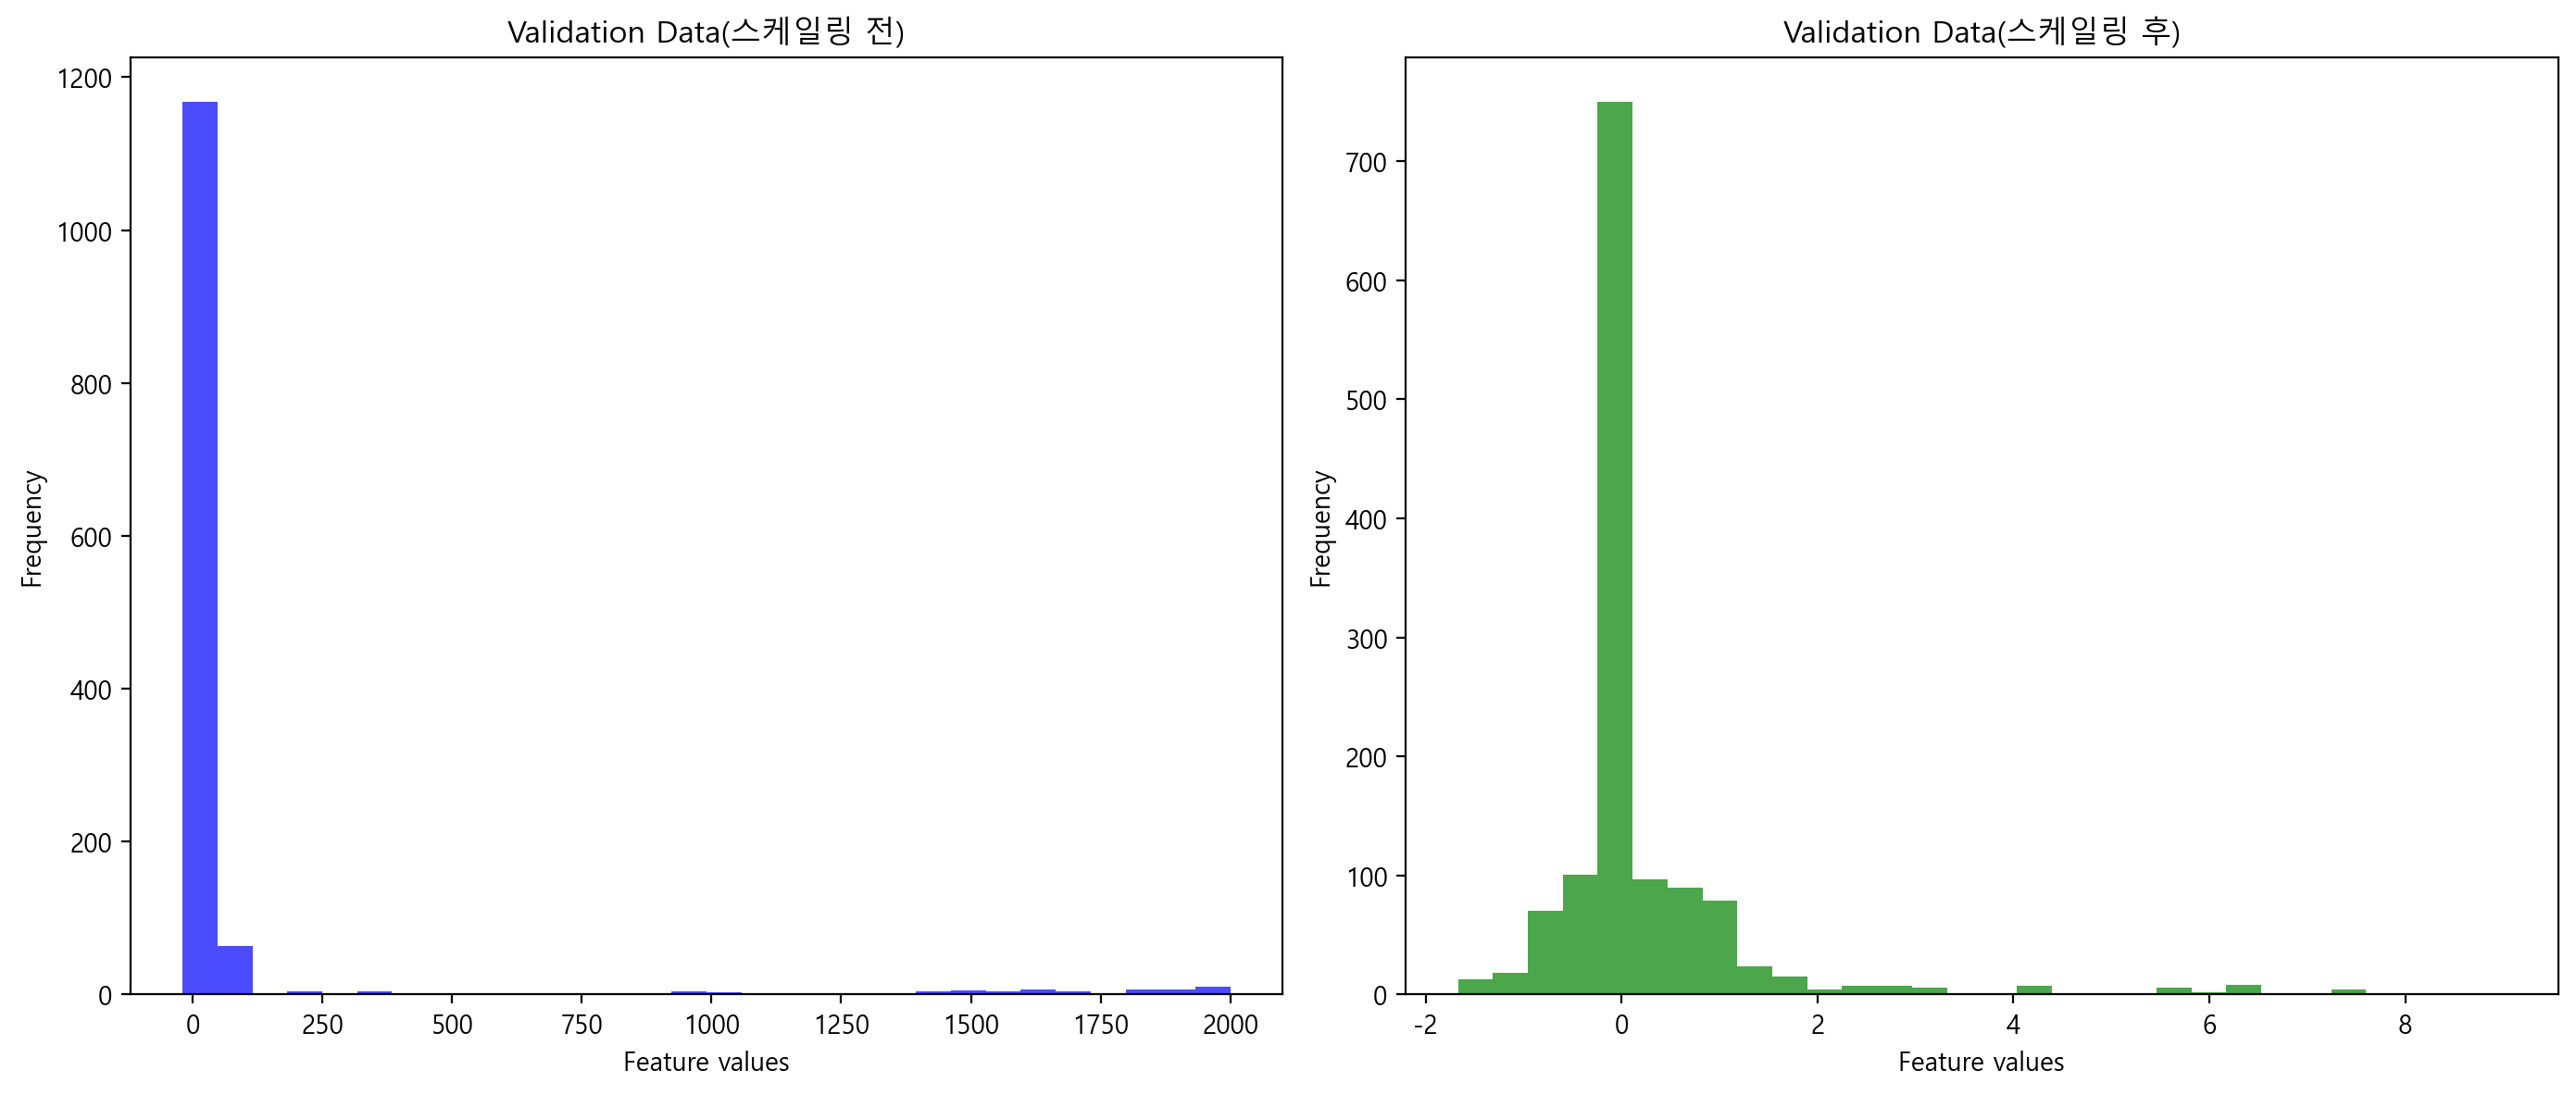

In [631]:
# 학습 데이터 스케일링 전후 비교
plot_histograms(X_train_before, X_train_rs, 'Training Data(스케일링 전)', 'Training Data(스케일링 후)')
# 검증 데이터 스케일링 전후 비교
plot_histograms(X_val_before, X_val_rs, 'Validation Data(스케일링 전)', 'Validation Data(스케일링 후)')

# 모델 학습 (랜덤 포레스트)

In [632]:
from sklearn.ensemble import RandomForestRegressor

modelrf = RandomForestRegressor(random_state=42)

In [633]:
print(modelrf.get_params())

{'bootstrap': True, 'ccp_alpha': 0.0, 'criterion': 'squared_error', 'max_depth': None, 'max_features': 1.0, 'max_leaf_nodes': None, 'max_samples': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'monotonic_cst': None, 'n_estimators': 100, 'n_jobs': None, 'oob_score': False, 'random_state': 42, 'verbose': 0, 'warm_start': False}


#### (1) 모델학습

    1. standard scaler

In [634]:
modelrf.fit(X_train_ss, y_train)

RandomForestRegressor(random_state=42)

    2. minmax scaler

In [635]:
modelrf.fit(X_train_mms, y_train)

RandomForestRegressor(random_state=42)

    3. maxabs scaler

In [636]:
modelrf.fit(X_train_mas, y_train)

RandomForestRegressor(random_state=42)

    4. robust scaler

In [637]:
modelrf.fit(X_train_rs, y_train)

RandomForestRegressor(random_state=42)

#### (2) 모델평가

    1. standard scaler

In [638]:
from sklearn.metrics import mean_absolute_error, mean_squared_error
print(modelrf.score(X_train_ss, y_train))
print(modelrf.score(X_val_ss, y_val))

pred = modelrf.predict(X_val_ss)

mae = mean_absolute_error(y_val, pred)
mse = mean_squared_error(y_val, pred)
rmse = np.sqrt(mean_squared_error(y_val, pred))
print("MSE: %f" % (mse))
print("RMSE: %f" % (rmse))
print("MAE: %f" % (mae))

0.6836932634293116
0.6982164877018253
MSE: 22645.691680
RMSE: 150.484855
MAE: 97.750000


    2. minmax scaler

In [639]:
from sklearn.metrics import mean_absolute_error, mean_squared_error
print(modelrf.score(X_train_mms, y_train))
print(modelrf.score(X_val_mms, y_val))

pred = modelrf.predict(X_val_mms)

mae = mean_absolute_error(y_val, pred)
mse = mean_squared_error(y_val, pred)
rmse = np.sqrt(mean_squared_error(y_val, pred))
print("MSE: %f" % (mse))
print("RMSE: %f" % (rmse))
print("MAE: %f" % (mae))

0.4301940566143957
0.511044882660808
MSE: 36690.960180
RMSE: 191.548845
MAE: 130.953902


    3. maxabs scaler

In [640]:
from sklearn.metrics import mean_absolute_error, mean_squared_error
print(modelrf.score(X_train_mas, y_train))
print(modelrf.score(X_val_mas, y_val))

pred = modelrf.predict(X_val_mas)

mae = mean_absolute_error(y_val, pred)
mse = mean_squared_error(y_val, pred)
rmse = np.sqrt(mean_squared_error(y_val, pred))
print("MSE: %f" % (mse))
print("RMSE: %f" % (rmse))
print("MAE: %f" % (mae))

0.15769799674489504
0.23051126569560476
MSE: 57742.069790
RMSE: 240.295796
MAE: 150.417561


    4. robust scaler

In [641]:
from sklearn.metrics import mean_absolute_error, mean_squared_error
print(modelrf.score(X_train_rs, y_train))
print(modelrf.score(X_val_rs, y_val))

pred = modelrf.predict(X_val_rs)

mae = mean_absolute_error(y_val, pred)
mse = mean_squared_error(y_val, pred)
rmse = np.sqrt(mean_squared_error(y_val, pred))
print("MSE: %f" % (mse))
print("RMSE: %f" % (rmse))
print("MAE: %f" % (mae))

0.973186863180882
0.8390453992178447
MSE: 12077.956930
RMSE: 109.899759
MAE: 55.232073


가능한 수치인가 1.0이라니 여쭤볼 것 !!

> score가 가장 높은 standard scaler선택

# 하이퍼파라미터 튜닝

#### (1) GridSearch

In [642]:
from sklearn.model_selection import GridSearchCV

In [643]:
# 하이퍼파라미터를 딕셔너리로 설정
modelrf2 = RandomForestRegressor(random_state = 42)

# 하이퍼파라미터 그리드 설정
params_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'bootstrap': [True, False]
}

In [644]:
# param_grid 하이퍼 파라미터를 3개의 train, valid set fold 로 나누어 테스트 수행
gs = GridSearchCV(estimator=modelrf2,param_grid=params_grid , cv = 3)

# params_grid 의 하이퍼 파라미터를 순차적으로 학습/평가
gs.fit(X_train_ss, y_train)

GridSearchCV(cv=3, estimator=RandomForestRegressor(random_state=42),
             param_grid={'bootstrap': [True, False],
                         'max_depth': [None, 10, 20, 30],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [50, 100, 200]})

In [645]:
gs.best_score_

np.float64(0.7090392366853328)

In [646]:
gs.best_params_

{'bootstrap': True,
 'max_depth': None,
 'min_samples_leaf': 2,
 'min_samples_split': 2,
 'n_estimators': 100}

In [647]:
rf_tune1 = gs.best_estimator_

In [648]:
from sklearn.metrics import mean_absolute_error, mean_squared_error
print(rf_tune1.score(X_train_ss, y_train))
print(rf_tune1.score(X_val_ss, y_val))

pred = rf_tune1.predict(X_val_ss)

mae = mean_absolute_error(y_val, pred)
mse = mean_squared_error(y_val, pred)
rmse = np.sqrt(mean_squared_error(y_val, pred))
print("MSE: %f" % (mse))
print("RMSE: %f" % (rmse))
print("MAE: %f" % (mae))

0.9569172214683291
0.8379635657506703
MSE: 12159.137201
RMSE: 110.268478
MAE: 54.706904


> 기본 모델보다 성능히 훨씬 좋아졌다.

#### (2) ManualSearch

In [649]:
# 모델 선언

from sklearn.ensemble import RandomForestRegressor

ms_model = RandomForestRegressor(random_state=42, n_estimators= 100, max_depth= 20, min_samples_split= 5, min_samples_leaf= 2, bootstrap= True)

# 모델 학습

ms_model.fit(X_train_ss, y_train)

# 모델 평가
from sklearn.metrics import mean_absolute_error, mean_squared_error
print(ms_model.score(X_train_ss, y_train))
print(ms_model.score(X_val_ss, y_val))

pred = ms_model.predict(X_val_ss)

mae = mean_absolute_error(y_val, pred)
mse = mean_squared_error(y_val, pred)
rmse = np.sqrt(mean_squared_error(y_val, pred))
print("MSE: %f" % (mse))
print("RMSE: %f" % (rmse))
print("MAE: %f" % (mae))

0.9546280835924446
0.8351487634484938
MSE: 12370.358631
RMSE: 111.222114
MAE: 54.922291


GridSearch와 아주 미묘한 차이가 있는데 GridSearch가 성능이 아주 조금 더 좋다.

> 스코어가 너무 높아서 과적합이 의심된다.    
과적합(overfitting) : 모델이 학습 데이터에 너무 잘 맞춰져서 검증 데이터나 새로운 데이터에 일반화되지 않는 경우  
과적합은 주로 모델이 학습 데이터의 노이즈와 세부 사항을 과도하게 학습할 때 발생

#### 학습곡선으로 과적합 확인
과적합이 발생하면 훈련 데이터의 오류는 매우 낮고, 검증 데이터의 오류는 상대적으로 높게 나타난다.

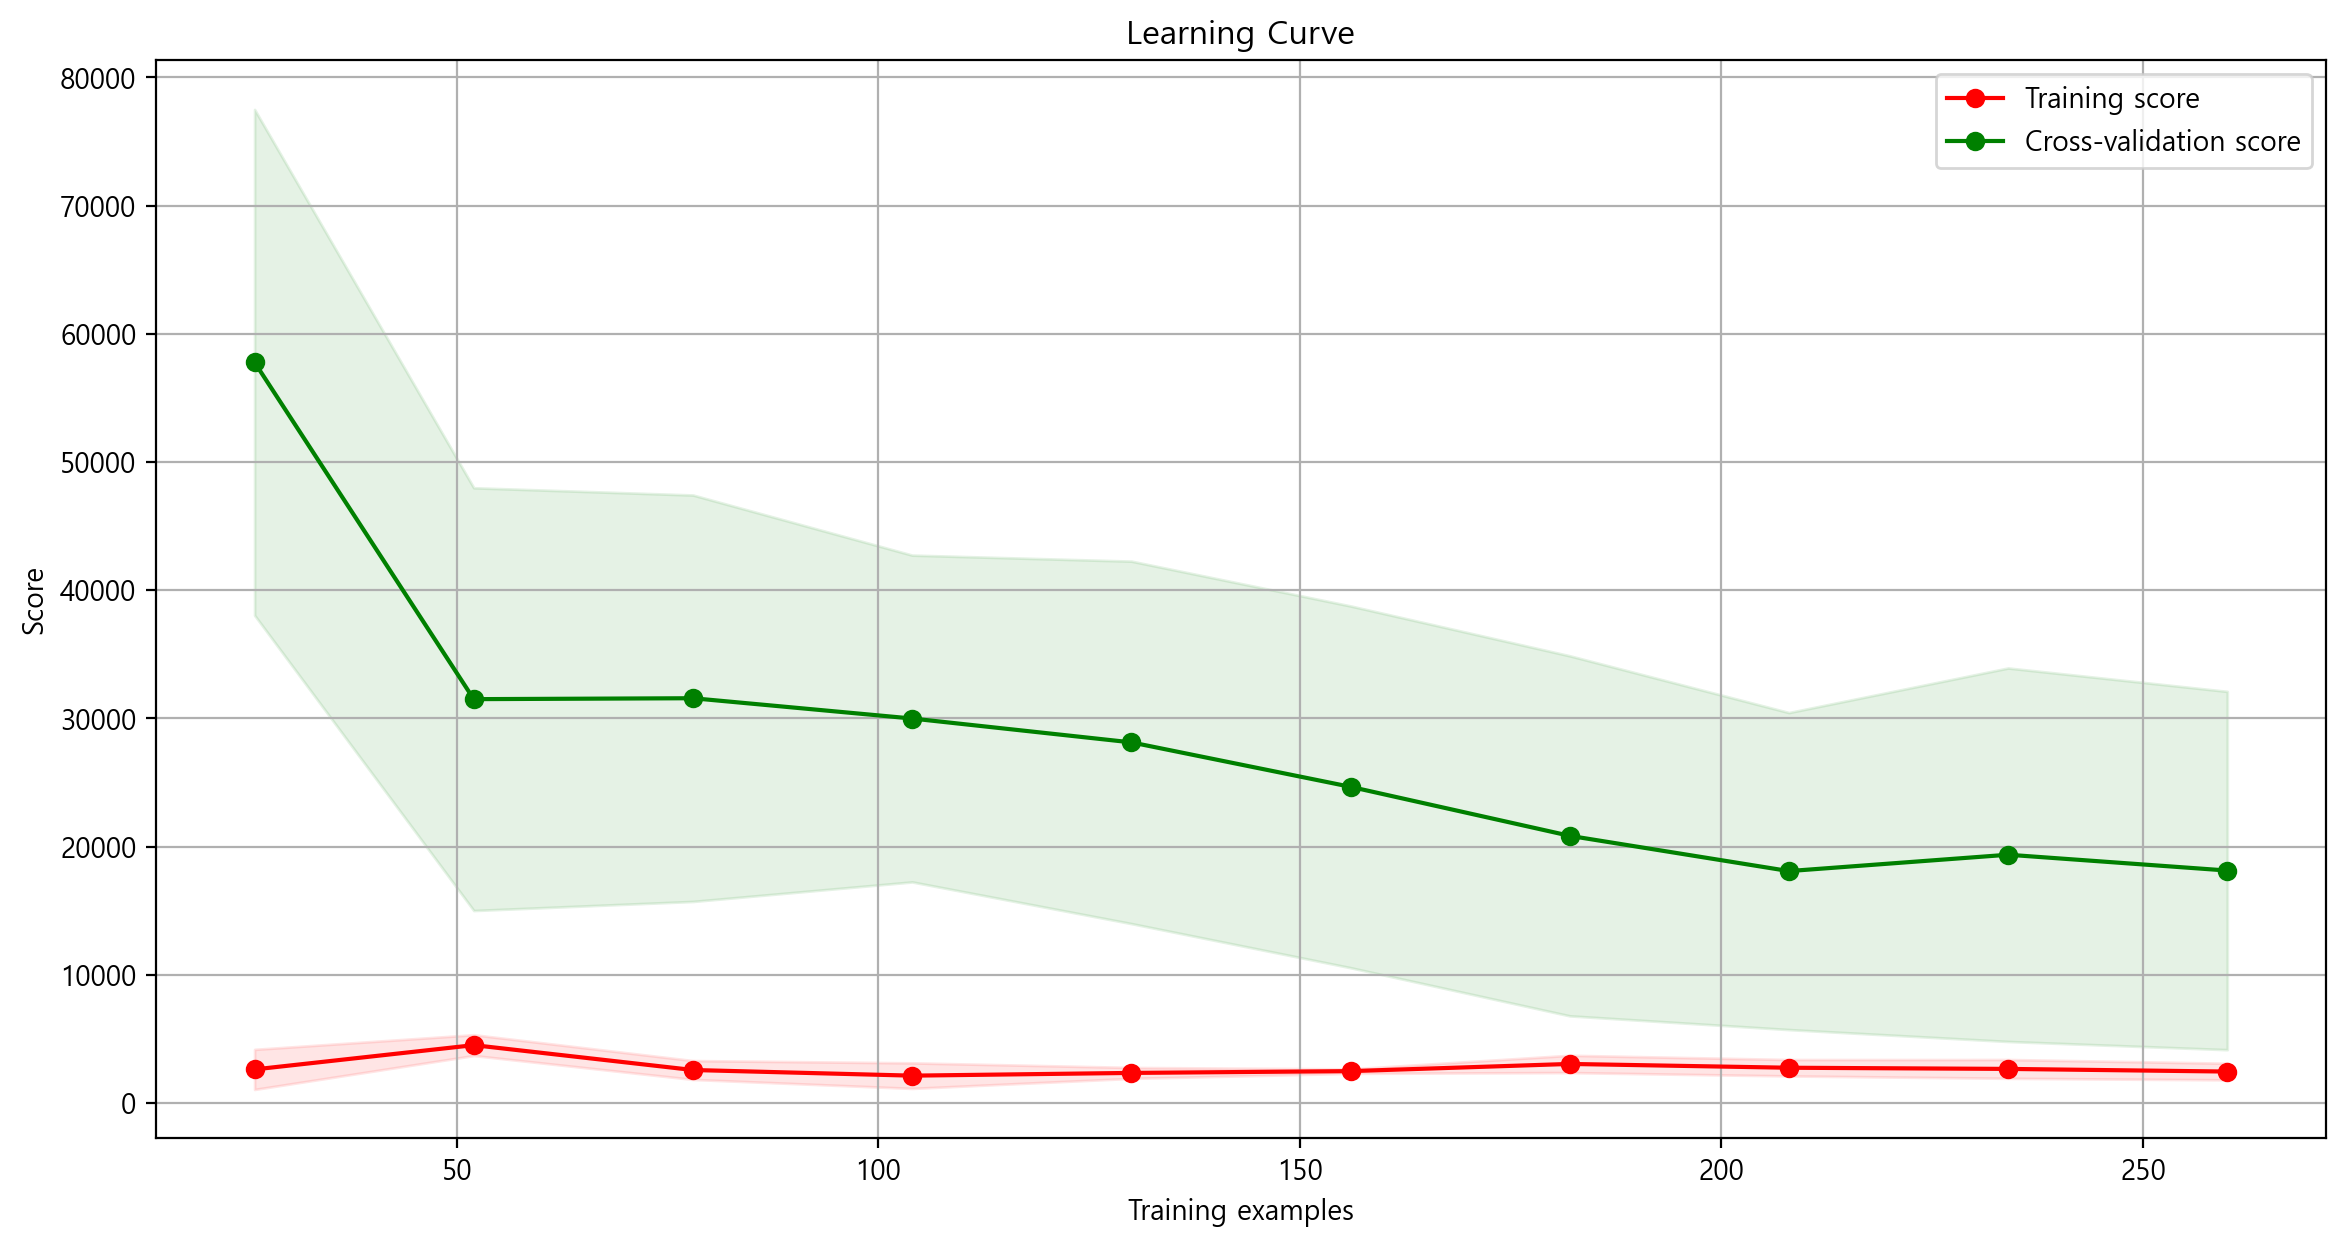

In [650]:
from sklearn.model_selection import learning_curve

# 학습 곡선 그리기
train_sizes, train_scores, val_scores = learning_curve(modelrf, X_train_ss, y_train, cv=5, scoring='neg_mean_squared_error', n_jobs=-1, train_sizes=np.linspace(0.1, 1.0, 10))

# 평균과 표준편차 계산
train_scores_mean = -train_scores.mean(axis=1)
train_scores_std = train_scores.std(axis=1)
val_scores_mean = -val_scores.mean(axis=1)
val_scores_std = val_scores.std(axis=1)

# 학습 곡선 시각화
plt.figure(figsize=(14, 7))
plt.plot(train_sizes, train_scores_mean, 'o-', color='r', label='Training score')
plt.plot(train_sizes, val_scores_mean, 'o-', color='g', label='Cross-validation score')
plt.fill_between(train_sizes, train_scores_mean - train_scores_std, train_scores_mean + train_scores_std, alpha=0.1, color='r')
plt.fill_between(train_sizes, val_scores_mean - val_scores_std, val_scores_mean + val_scores_std, alpha=0.1, color='g')
plt.title('Learning Curve')
plt.xlabel('Training examples')
plt.ylabel('Score')
plt.legend(loc='best')
plt.grid()
plt.show()

In [651]:
# 변수 중요도 추출
importances = rf_tune1.feature_importances_
feature_names = X.columns
feature_importances = pd.DataFrame({'Feature': feature_names, 'Importance': importances})

# 중요도 순으로 정렬
feature_importances = feature_importances.sort_values(by='Importance', ascending=False)

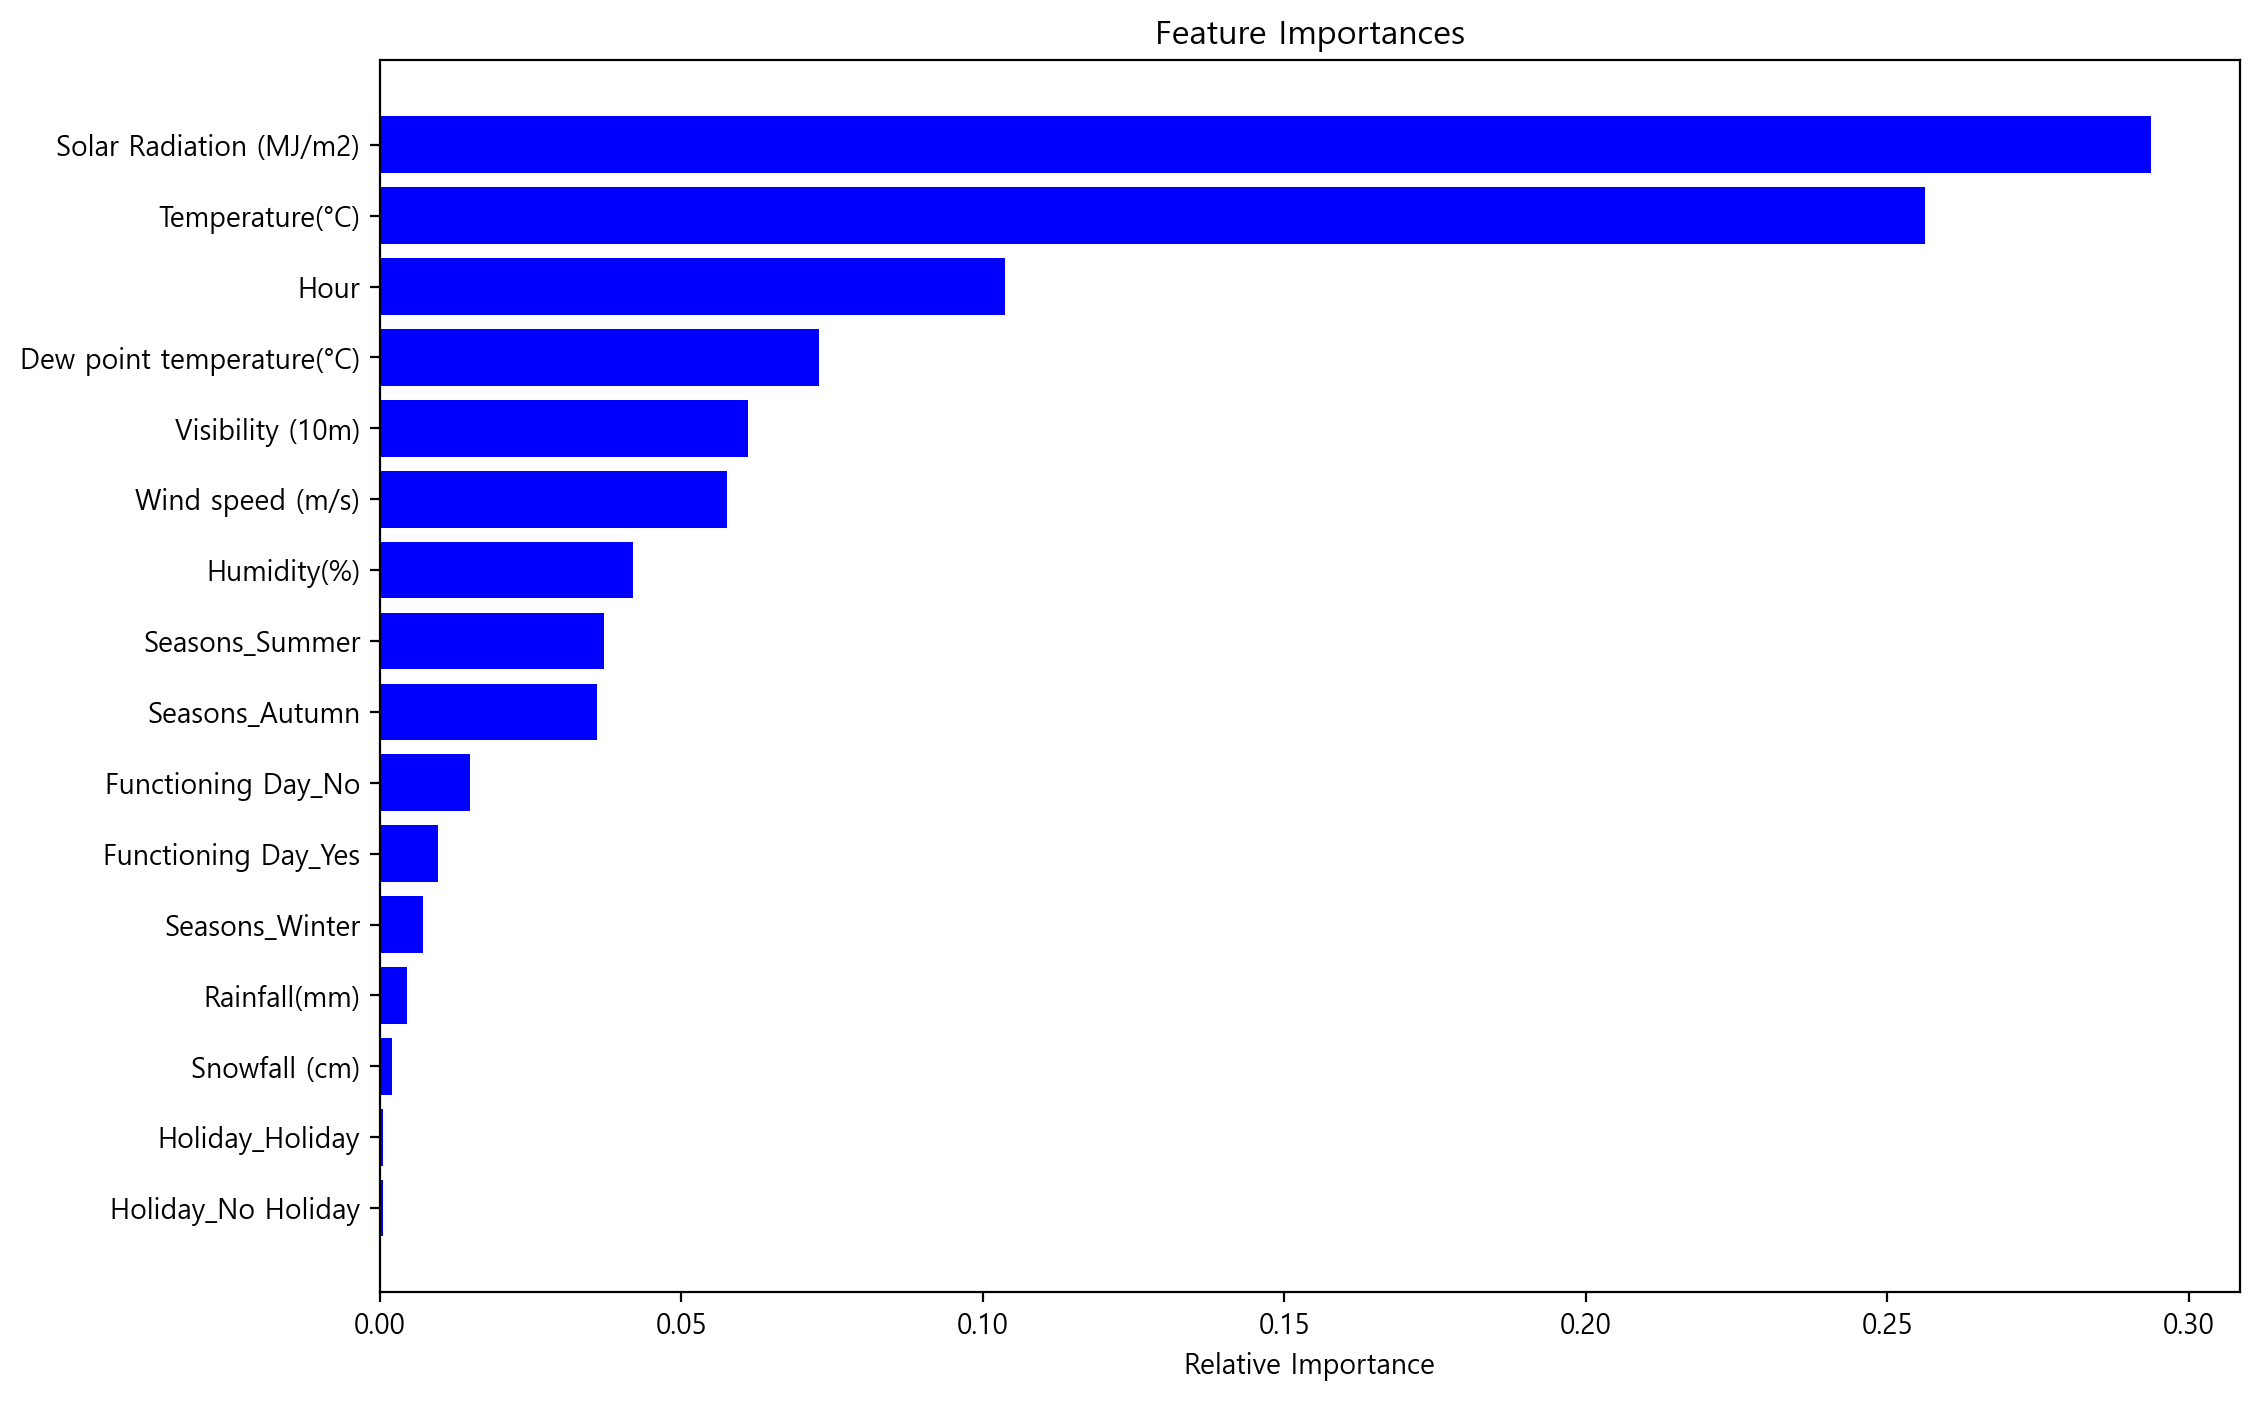

In [652]:
# 변수 중요도 시각화
plt.figure(figsize=(12, 8))
plt.title('Feature Importances')
plt.barh(feature_importances['Feature'], feature_importances['Importance'], color='b', align='center')
plt.xlabel('Relative Importance')
plt.gca().invert_yaxis()
plt.show()

1. 일조량:  
날씨가 맑고 햇빛이 충분할 때 사람들이 자전거를 대여할 가능성이 높다는 것을 의미  
일조량이 많을수록 야외 활동을 선호하기 때문에 자전거 대여량이 증가하는 것으로 보임  
=> 일조량이 높은 날 자전거를 많이 배치한다.

2. 기온:  
적절한 기온에서 자전거를 타는 사람들이 더 많을 가능성이 큼  
너무 낮거나 너무 높은 기온에서는 자전거 이용이 줄어들 것이다.  
=> 기온이 적절한 날에 자전거 대여를 활성화하는 마케팅 전략을 수립한다.

3. 시간:  
특정 시간대(출퇴근 시간, 주말의 오후 시간대)에 자전거 대여량이 집중된다는 것을 의미  
시간에 따른 수요 패턴을 분석하여, 자전거 대여 시스템을 시간대별로 효율적으로 운영할 수 있도록 계획해야한다.  
=>출퇴근 시간대에는 자전거의 배치와 관리에 더 많은 리소스를 투입할 필요가 있다.

# 최종모델 test 예측

In [653]:
data_test_final.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1752 entries, 0 to 1751
Data columns (total 16 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Hour                       1752 non-null   int64  
 1   Temperature(°C)            1752 non-null   float64
 2   Humidity(%)                1752 non-null   float64
 3   Wind speed (m/s)           1752 non-null   float64
 4   Visibility (10m)           1752 non-null   int64  
 5   Dew point temperature(°C)  1752 non-null   float64
 6   Solar Radiation (MJ/m2)    1752 non-null   float64
 7   Rainfall(mm)               1752 non-null   float64
 8   Snowfall (cm)              1752 non-null   float64
 9   Seasons_Autumn             1752 non-null   float64
 10  Seasons_Summer             1752 non-null   float64
 11  Seasons_Winter             1752 non-null   float64
 12  Holiday_Holiday            1752 non-null   float64
 13  Holiday_No Holiday         1752 non-null   float

In [654]:
#객체 생성
ss = StandardScaler()

#학습 및 변환
X_test_ss = ss.fit_transform(data_test_final)

In [656]:
final_model = RandomForestRegressor(random_state=42, n_estimators= 100, max_depth= 20, min_samples_split= 5, min_samples_leaf= 2, bootstrap= True)

#### 모델 학습

final_model.fit(X_train_ss, y_train)

#### test 데이터로 예측
data_test_final_copy=data_test_final.copy()
data_test_final['Rented Bike Count'] = final_model.predict(X_test_ss)

In [657]:
data_test_final.to_csv('test_예측완료.csv', index = False)

#### K-fold 교차 검증

In [661]:
from sklearn.model_selection import KFold, cross_val_score

In [662]:
# K-Fold 교차검증 설정
kf = KFold(n_splits=5, shuffle=True, random_state=42)

In [670]:
model_k = RandomForestRegressor(random_state=42, n_estimators= 100, max_depth= None, min_samples_split= 2, min_samples_leaf= 2, bootstrap= True)

In [671]:
# 교차검증 수행 (MSE를 사용하여 성능 평가)
scores = cross_val_score(model_k, X_train_ss, y_train, cv=kf, scoring='neg_mean_squared_error')

# MSE가 음수로 반환되므로, 이를 양수로 변환 후 RMSE 계산
rmse_scores = np.sqrt(-scores)

# 교차검증 결과 출력
print("교차 검증 RMSE Scores:", rmse_scores)
print("평균 RMSE:", rmse_scores.mean())
print("RMSE의 표준편차:", rmse_scores.std())

교차 검증 RMSE Scores: [119.54926323 102.17808426 123.36155973  65.95337126 181.45375617]
평균 RMSE: 118.49920692751748
RMSE의 표준편차: 37.45788102472886


In [674]:
# 모델 학습
model_k.fit(X_train_ss, y_train)

# test 예측
data_test_final_copy['Rented Bike Count'] = model_k.predict(X_test_ss)

In [673]:
data_test_final_copy.to_csv('test_예측완료kf.csv', index = False)